# Assignment 2-3 optional
author: Dominika Maciąg 

# Bank Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

bank_df = pd.read_csv('lending-club-data.csv', low_memory=False)
bank_df.loc[:,['loan_amnt', 'total_pymnt', 'grade_num', 'annual_inc', 'installment', 'int_rate', 'dti']].head(n=10)

# Lets check how our data looks like by chosing the most interesting columns and showing 10 rows of it.

loan_amnt  total_pymnt  grade_num  annual_inc  installment  int_rate    dti
0       5000      5861.07          5     24000.0       162.87     10.65  27.65
1       2500      1008.71          4     30000.0        59.83     15.27   1.00
2       2400      3003.65          4     12252.0        84.33     15.96   8.72
3      10000     12226.30          4     49200.0       339.31     13.49  20.00
4       5000      5631.38          6     36000.0       156.46      7.90  11.20
5       3000      3938.14          2     48000.0       109.43     18.64   5.35
6       5600       646.02          1     40000.0       152.39     21.28   5.55
7       5375      1476.19          5     15000.0       121.45     12.69  18.08
8       6500      7677.52          4     72000.0       153.45     14.65  16.12
9      12000     13943.10          5     75000.0       402.54     12.69  10.78

# Exercise 1
a) Create and train simple regression model.\
b) Evaluate and visualise created model. \
c) Create and plot higher order polynomial regression models.

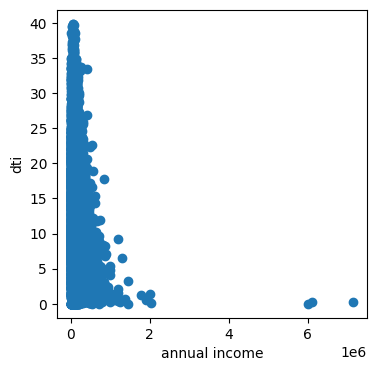

In [11]:
# firstly lets see relationship between data on scatter plot

x_axis = bank_df.loc[:,"annual_inc"]
y_axis = bank_df.loc[:,"dti"]

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
plt.scatter(x_axis,y_axis)
plt.xlabel("annual income")
plt.ylabel("dti")
plt.show()

## Summary:
What is DTI? Debt to income ratio demonstrates a good balance between debt and income. In other words, if your DTI ratio is 15%, that means that 15% of your monthly gross income goes to debt payments each month. 

For this bank biggest acceptable DTI is 40% 

The lower is the DTI the better finantial situation client has. As we can see more wealthy clients do not need to take loans as much as those that has worse finantial situations, that is why they have smaller DTI ratio. 

In [14]:
#a) Create and train simple regression model of annual income to DTI.

X = bank_df.annual_inc.values.reshape(-1,1)[:1000]
y = bank_df.dti.values.reshape(-1)[:1000]

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X,y)

LinearRegression(n_jobs=1)

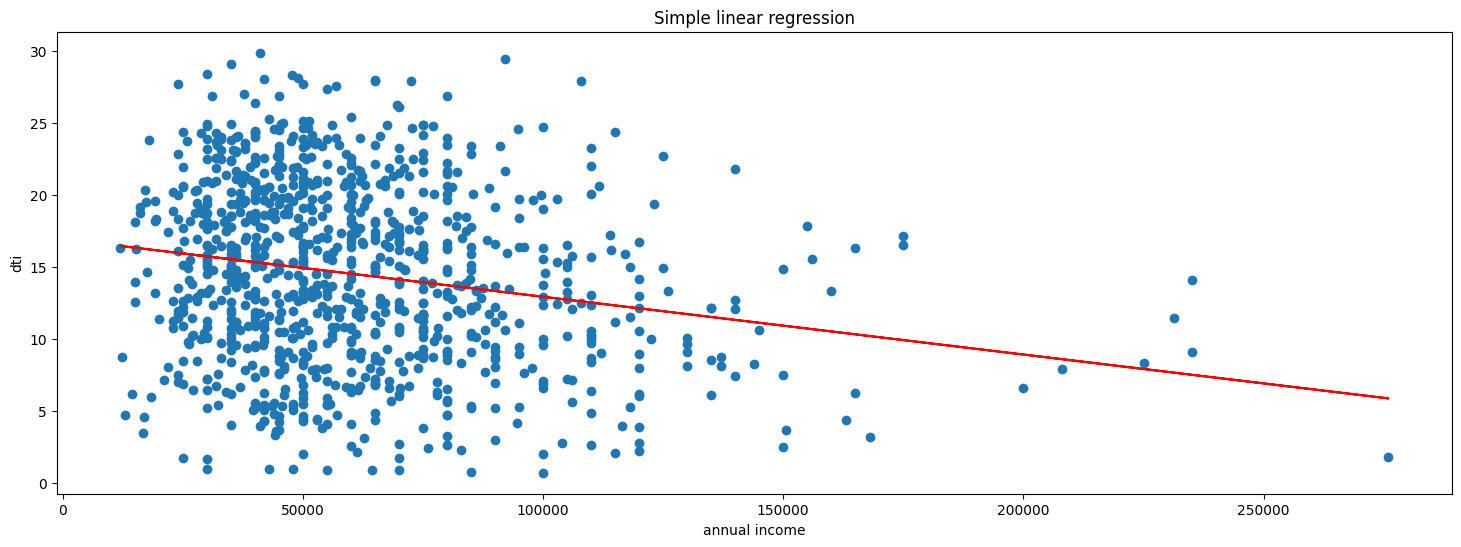

Coefficients:  [-4.00538208e-05]
Intercept:  16.928092385245435
Score:  0.04195310420001486
Mean squared error equals: 36.892395779232245


In [13]:
#b) Evaluate and visualise created model

y_pred = model.predict(X)
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(6)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.ticklabel_format(style='plain') 
plt.xlabel("annual income");
plt.ylabel("dti");
plt.title("Simple linear regression")
plt.show()

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Score: ", model.score(X,y))
print("Mean squared error equals:", mean_squared_error(y, y_pred))

## Summary: 
As we can observe the relationship between two variables is quite strong, we can see that the line is descending with increased income. Linear regression line shows us the estimate of y variable (in my case DTI).

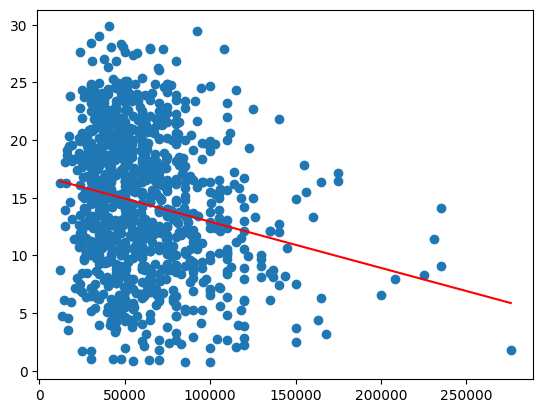

error:  36.892395779232245


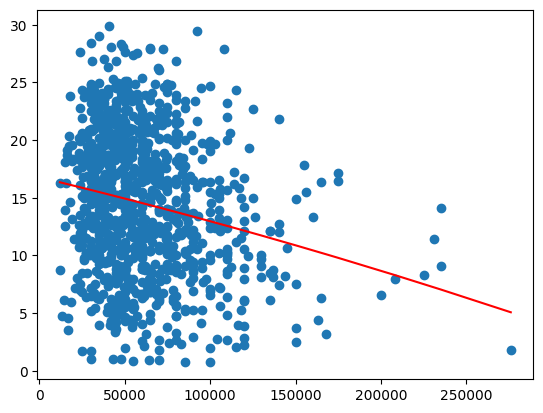

error:  36.889593842382276


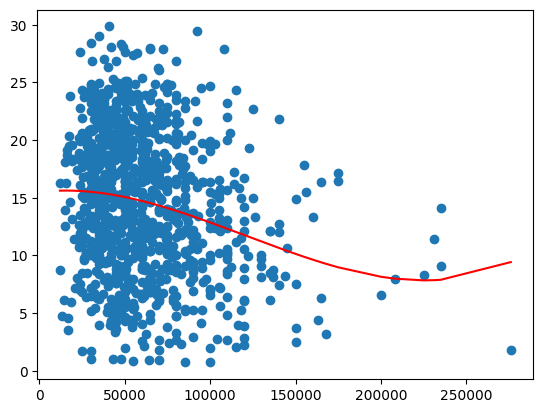

error:  36.823972250583566


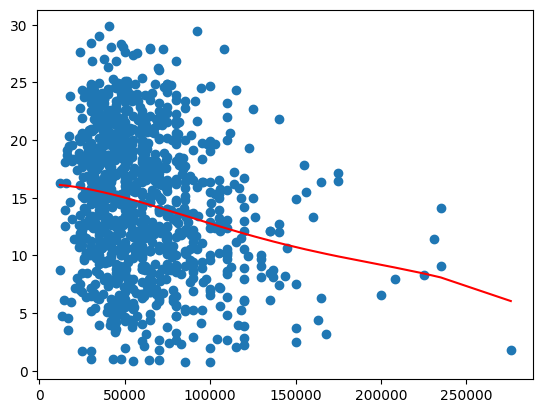

error:  36.810054485178334


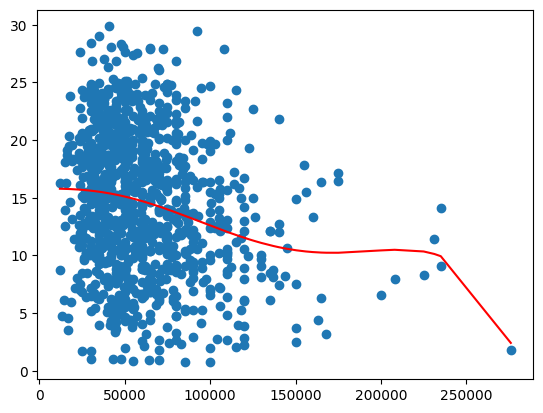

error:  36.71866875503784


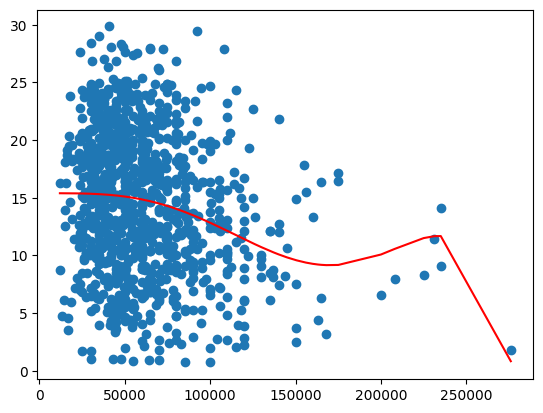

error:  36.76518002147086


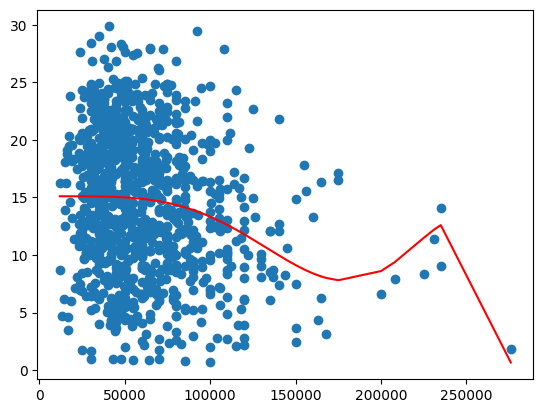

error:  36.94929186128118


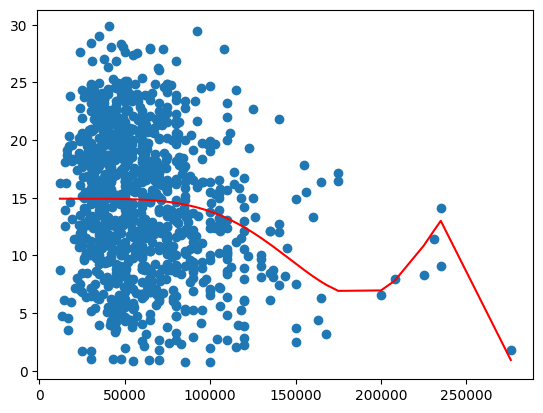

error:  37.183235727475086


In [15]:
#c) Create and plot higher order polynomial regression models.

X_sorted = X[X[:, 0].argsort()]
Y_sorted = y[X[:, 0].argsort()]
array = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X_sorted)

    # Visualizing the Polymonial Regression results
    pol = LinearRegression()
    pol.fit(X_order, Y_sorted)
    plt.scatter(X, y)
    Y = pol.predict(poly.fit_transform(X_sorted))
    plt.plot(X_sorted,Y, color="red")
    plt.show()
    
    ##### errors #####
    pred = pol.predict(poly.fit_transform(X))
    array.insert(order, mean_squared_error(y, pred)) 
    print("error: ", mean_squared_error(y, pred))


## Summary
As we know polymonial regression is better at fitting data than linear regression. It is especially visible when we use higher order polynomial regression models. With my data the difference is not that high and for example polymonial regression of degree 8 gives bigger error than linear regression. 

## Model performance
To create plot of model performance I used array to store error values that I calculated for each degree.
There are different methods that are used to assess the quality of a regression model.
The one that I used for each degree was - MSE (Mean Squared Error). 
The lower the MSE the better.

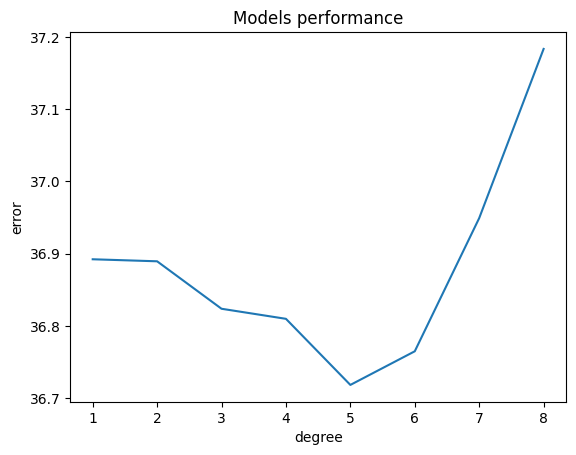

In [16]:
degree = [1,2,3,4,5,6,7,8]
plt.plot(degree,array)
plt.xlabel("degree");
plt.ylabel("error");
plt.title("Models performance")
plt.show()

## Summary:
Error is smallest for 5th degree. Error decreased by 0.47% compaed to error that gave us linear regression on data chosen by me.

# Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data. \
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

In [30]:
#a)

array_train = []
array_test = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    pol = LinearRegression()
    pol.fit(X_train, y_train)
    
    pol2 = LinearRegression()
    pol2.fit(X_test, y_test)
    
    ##### errors #####
    pred1 = pol.predict(X_train)
    array_train.insert(order, mean_squared_error(y_train, pred1)) 
    # print("error: ", mean_squared_error(y_train, pred1))
    
    pred2 = pol.predict(X_test)
    array_test.insert(order, mean_squared_error(y_test, pred2)) 
    # print("error2: ", mean_squared_error(y_test, pred2))

plt.plot(degree,array_train, label="train error")
plt.plot(degree,array_test, label="test error")
plt.xlabel("degree");
plt.ylabel("error");
plt.title("Models performance")
plt.legend()
plt.show()

[2.40000e+04 5.00000e+03 5.86107e+03 1.06500e+01]
[3.00000e+04 2.50000e+03 1.00871e+03 1.52700e+01]
[12252.    2400.    3003.65    15.96]
[4.92000e+04 1.00000e+04 1.22263e+04 1.34900e+01]
[3.60000e+04 5.00000e+03 5.63138e+03 7.90000e+00]
[4.80000e+04 3.00000e+03 3.93814e+03 1.86400e+01]
[4.0000e+04 5.6000e+03 6.4602e+02 2.1280e+01]
[1.50000e+04 5.37500e+03 1.47619e+03 1.26900e+01]
[7.20000e+04 6.50000e+03 7.67752e+03 1.46500e+01]
[7.50000e+04 1.20000e+04 1.39431e+04 1.26900e+01]
[3.0000e+04 9.0000e+03 2.2707e+03 1.3490e+01]
[1.50000e+04 3.00000e+03 3.47898e+03 9.91000e+00]
[1.00000e+05 1.00000e+04 7.47199e+03 1.06500e+01]
[2.80000e+04 1.00000e+03 1.27017e+03 1.62900e+01]
[4.20000e+04 1.00000e+04 1.25193e+04 1.52700e+01]
[1.10000e+05 3.60000e+03 3.78502e+03 6.03000e+00]
[8.4000e+04 6.0000e+03 7.1645e+03 1.1710e+01]
[7.73850e+04 9.20000e+03 9.45996e+03 6.03000e+00]
[1.05000e+05 2.10000e+04 1.40254e+04 1.24200e+01]
[5.00000e+04 1.00000e+04 1.19026e+04 1.17100e+01]
[5.00000e+04 1.00000e+04

[1.72800e+04 1.00000e+03 1.05826e+03 1.62900e+01]
[5.81950e+04 1.10000e+04 1.18754e+04 9.91000e+00]
[3.20000e+04 9.00000e+03 1.12533e+04 1.67700e+01]
[2.00000e+04 3.00000e+03 3.62064e+03 1.26900e+01]
[1.44000e+04 2.00000e+03 2.34375e+03 1.06500e+01]
[3.50000e+04 1.25000e+04 3.39978e+03 1.67700e+01]
[7.20000e+04 1.30000e+04 1.46983e+04 1.06500e+01]
[9.60000e+04 2.10000e+04 2.53778e+04 1.46500e+01]
[2.64000e+04 1.50000e+04 1.83261e+04 1.26900e+01]
[1.04371e+05 1.50000e+04 1.91800e+04 1.67700e+01]
[2.60000e+04 5.00000e+03 5.49744e+03 7.90000e+00]
[4.50000e+04 1.00000e+04 1.11903e+04 7.51000e+00]
[1.02000e+05 3.00000e+04 3.16679e+04 1.67700e+01]
[8.50000e+04 1.20000e+04 1.22858e+04 1.46500e+01]
[3.72450e+04 7.20000e+03 8.08083e+03 8.90000e+00]
[9.000e+04 2.000e+04 2.156e+03 2.089e+01]
[5.49600e+04 5.50000e+03 6.02588e+03 6.03000e+00]
[3.77930e+04 1.76250e+04 2.12814e+04 1.26900e+01]
[1.90000e+04 8.32500e+03 9.12447e+03 6.62000e+00]
[4.00000e+04 1.05000e+04 1.24844e+04 1.42700e+01]
[3.5000e

[9.00000e+04 1.00000e+04 1.20687e+04 1.26900e+01]
[3.35350e+04 1.67500e+04 2.14728e+04 1.42700e+01]
[7.5000e+04 1.4000e+04 1.8263e+04 1.4270e+01]
[1.50000e+05 3.00000e+04 3.39126e+04 8.90000e+00]
[7.50000e+04 1.00000e+04 1.02756e+04 7.90000e+00]
[4.59750e+04 1.03750e+04 1.18678e+04 1.17100e+01]
[5.66500e+04 5.00000e+03 6.31903e+03 1.59600e+01]
[1.00000e+05 9.20000e+03 1.00034e+04 6.03000e+00]
[1.45000e+05 3.40000e+04 4.29836e+04 1.42700e+01]
[8.00000e+04 3.50000e+04 4.18805e+04 1.24200e+01]
[3.80000e+04 5.00000e+03 1.24813e+03 9.91000e+00]
[1.88160e+04 6.35000e+03 1.89624e+03 1.17100e+01]
[8.52000e+04 1.30000e+04 2.96259e+03 1.67700e+01]
[7.00000e+04 3.50000e+04 1.66326e+04 1.52700e+01]
[7.20000e+04 1.40000e+04 1.76196e+04 1.34900e+01]
[1.84000e+05 2.50000e+04 2.59425e+04 1.26900e+01]
[4.92000e+04 3.60000e+03 4.57385e+03 1.62900e+01]
[4.00000e+04 5.50000e+03 3.39777e+03 1.06500e+01]
[3.18000e+04 3.60000e+03 3.70692e+03 7.51000e+00]
[3.70000e+04 5.00000e+03 5.65308e+03 1.06500e+01]
[8.0

[6.00000e+04 9.80000e+03 1.19718e+04 1.34900e+01]
[6.50000e+04 8.00000e+03 4.28169e+03 1.67700e+01]
[3.40000e+04 6.00000e+03 7.24446e+03 1.26900e+01]
[4.56000e+04 1.00000e+04 1.22135e+04 1.34900e+01]
[3.7200e+04 7.0000e+03 8.4342e+03 1.2420e+01]
[1.80000e+05 1.60000e+04 1.68283e+04 6.03000e+00]
[1.20000e+05 1.10000e+04 1.20521e+04 6.03000e+00]
[4.00000e+04 4.20000e+03 5.26069e+03 1.42700e+01]
[3.88800e+04 9.50000e+03 1.00351e+04 7.51000e+00]
[5.50000e+04 8.00000e+03 8.62583e+03 6.62000e+00]
[5.95000e+04 1.20000e+04 1.30896e+04 6.62000e+00]
[8.50000e+04 1.50000e+04 1.66982e+04 7.90000e+00]
[4.70000e+04 5.00000e+03 5.53375e+03 8.90000e+00]
[5.00000e+04 1.02250e+04 1.20855e+04 1.46500e+01]
[7.2000e+04 1.5000e+04 1.8319e+04 1.3490e+01]
[7.80000e+04 2.75000e+04 2.86406e+04 1.26900e+01]
[3.60000e+04 5.00000e+03 5.20243e+03 7.51000e+00]
[8.60000e+04 8.50000e+03 9.31304e+03 6.03000e+00]
[5.80440e+04 8.87500e+03 3.41944e+03 7.90000e+00]
[4.00000e+04 3.50000e+03 3.64831e+03 7.90000e+00]
[9.80000

[5.76000e+04 1.00000e+04 1.09565e+04 6.03000e+00]
[6.00000e+04 2.16000e+04 2.65552e+04 1.26900e+01]
[4.20000e+04 1.50000e+04 1.77814e+04 1.26900e+01]
[3.80000e+04 4.00000e+03 4.64221e+03 1.46500e+01]
[6.4600e+04 5.0000e+03 5.6314e+03 7.9000e+00]
[6.00000e+04 1.28000e+04 1.55463e+04 1.59600e+01]
[1.33000e+05 1.20000e+04 6.34605e+03 1.62900e+01]
[9.00000e+05 3.00000e+04 3.51664e+04 1.26900e+01]
[2.86000e+05 3.00000e+04 3.31581e+04 6.62000e+00]
[8.70000e+04 1.56000e+04 2.78775e+03 1.72700e+01]
[1.25004e+05 3.00000e+04 3.37917e+04 7.90000e+00]
[1.00000e+05 3.50000e+04 8.76199e+03 2.23500e+01]
[2.16000e+04 3.50000e+03 4.16535e+03 1.72700e+01]
[3.60000e+04 7.27500e+03 7.54143e+03 6.03000e+00]
[3.84000e+04 6.82500e+03 7.79782e+03 8.90000e+00]
[5.79960e+04 2.80000e+04 1.35165e+04 2.12800e+01]
[4.50000e+04 5.00000e+03 5.26144e+03 6.03000e+00]
[3.6000e+04 1.4775e+04 1.6329e+04 6.6200e+00]
[8.50000e+04 1.25000e+04 1.36956e+04 6.03000e+00]
[1.92000e+04 6.00000e+03 6.42219e+03 6.03000e+00]
[7.50000

[6.76440e+04 6.00000e+03 6.49014e+03 6.99000e+00]
[1.20000e+05 1.45000e+04 1.57425e+04 5.42000e+00]
[1.36000e+05 2.50000e+04 3.74022e+04 2.06200e+01]
[4.80000e+04 1.00000e+04 1.16114e+04 9.99000e+00]
[1.04400e+05 2.00000e+04 2.08627e+04 1.74900e+01]
[5.49960e+04 1.68000e+04 2.13534e+04 1.19900e+01]
[4.80000e+04 1.04000e+04 1.08975e+04 5.99000e+00]
[5.50000e+04 1.36000e+04 6.75486e+03 1.47900e+01]
[5.20000e+04 3.90000e+03 4.56803e+03 1.29900e+01]
[9.80000e+04 1.50000e+04 2.53187e+03 1.29900e+01]
[6.50000e+04 1.40000e+04 1.62513e+04 9.99000e+00]
[4.0800e+04 1.8250e+04 5.5134e+03 1.7490e+01]
[8.06900e+04 3.00000e+04 3.34374e+04 7.49000e+00]
[1.12000e+05 2.10000e+04 2.60045e+04 1.64900e+01]
[9.10000e+04 1.00000e+04 1.17761e+04 1.09900e+01]
[5.20080e+04 2.00000e+04 1.67937e+04 1.05900e+01]
[5.00000e+04 2.00000e+03 2.31707e+03 1.09900e+01]
[4.10000e+04 2.20000e+04 1.68655e+04 1.39900e+01]
[9.36000e+04 5.60000e+03 6.69942e+03 1.19900e+01]
[3.32760e+04 6.10000e+03 7.58723e+03 1.09900e+01]
[3.7

[4.20000e+04 6.50000e+03 8.37246e+03 1.74900e+01]
[5.50000e+04 1.80000e+03 1.89075e+03 7.49000e+00]
[4.20000e+04 5.00000e+03 5.55678e+03 6.99000e+00]
[4.0000e+04 6.0000e+03 7.1729e+03 1.1990e+01]
[4.30000e+04 1.50000e+04 1.76189e+04 1.19900e+01]
[4.60000e+04 1.40000e+04 1.50929e+04 8.49000e+00]
[8.80000e+04 1.20000e+04 1.32184e+04 1.52300e+01]
[7.00000e+04 8.00000e+03 8.04724e+03 6.99000e+00]
[3.36000e+04 3.20000e+03 3.81505e+03 1.19900e+01]
[4.00000e+04 1.60000e+04 1.88597e+04 1.09900e+01]
[8.20000e+04 9.00000e+03 1.14629e+04 1.64900e+01]
[6.55000e+04 1.20000e+04 1.44332e+04 1.19900e+01]
[7.65000e+04 1.45000e+04 1.27154e+04 7.49000e+00]
[3.24000e+04 4.50000e+03 5.01721e+03 7.49000e+00]
[4.20000e+04 8.45000e+03 7.60877e+03 1.14900e+01]
[6.00000e+04 8.00000e+03 9.76153e+03 1.34900e+01]
[3.20000e+04 4.80000e+03 5.62129e+03 1.05900e+01]
[1.1000e+05 9.0000e+03 4.4927e+03 1.1490e+01]
[1.13000e+05 5.00000e+03 6.08292e+03 1.34900e+01]
[1.32000e+05 3.60000e+03 4.52835e+03 1.56200e+01]
[3.36000

[6.50000e+04 6.40000e+03 7.42981e+03 9.99000e+00]
[1.98000e+04 4.80000e+03 5.65341e+03 1.09900e+01]
[4.80000e+04 2.50000e+04 1.39748e+03 1.29900e+01]
[5.50000e+04 1.77500e+03 1.98595e+03 7.49000e+00]
[5.70000e+04 1.20000e+04 1.35589e+04 1.09900e+01]
[2.60040e+04 5.00000e+03 5.41522e+03 5.42000e+00]
[3.55680e+04 3.97500e+03 4.68076e+03 1.09900e+01]
[4.10000e+04 4.50000e+03 5.43255e+03 1.29900e+01]
[9.40000e+04 2.00000e+04 2.00135e+04 1.34900e+01]
[9.50000e+04 2.00000e+04 2.13495e+04 1.09900e+01]
[2.28000e+04 3.50000e+03 1.91721e+03 1.39900e+01]
[6.80000e+04 1.57000e+04 1.85519e+04 1.14900e+01]
[3.50000e+04 2.00000e+03 2.34252e+03 1.05900e+01]
[2.40000e+04 5.00000e+03 5.71306e+03 1.05900e+01]
[7.90000e+04 1.60000e+04 7.15894e+03 1.47900e+01]
[5.50000e+04 9.00000e+03 1.04821e+04 1.09900e+01]
[4.50000e+04 1.12000e+04 1.42911e+04 1.92900e+01]
[1.00080e+04 1.75000e+03 1.95828e+03 7.49000e+00]
[1.80000e+04 2.40000e+03 2.84033e+03 1.47900e+01]
[7.00000e+04 1.20000e+04 6.54125e+03 1.52300e+01]


[7.50000e+04 2.00000e+04 2.32317e+04 1.16300e+01]
[6.70000e+04 1.20000e+04 1.36994e+04 9.67000e+00]
[1.70000e+05 2.70000e+04 9.36684e+03 2.06900e+01]
[8.25600e+04 4.50000e+03 5.03041e+03 7.42000e+00]
[9.60000e+04 3.10000e+03 4.18507e+03 2.06900e+01]
[1.9000e+05 2.4000e+04 2.1372e+04 1.5620e+01]
[7.20000e+04 8.40000e+03 9.11894e+03 5.42000e+00]
[4.86720e+04 1.20000e+04 1.29265e+04 7.42000e+00]
[3.8000e+04 5.0000e+03 6.0693e+03 1.6590e+01]
[9.20000e+04 1.20000e+04 1.24818e+04 6.62000e+00]
[4.87000e+05 3.50000e+04 2.34888e+04 1.16300e+01]
[4.40040e+04 1.00000e+04 1.11732e+04 1.26200e+01]
[5.50000e+04 1.35000e+04 1.56046e+04 9.67000e+00]
[5.00000e+04 1.60000e+04 8.57987e+03 1.61100e+01]
[1.08000e+05 1.50000e+04 2.11312e+04 1.97900e+01]
[4.32000e+04 1.50000e+04 1.68975e+04 7.91000e+00]
[1.96000e+05 2.50000e+04 3.42422e+04 1.71900e+01]
[7.0000e+04 8.5000e+03 1.0038e+04 1.1140e+01]
[6.00000e+04 1.50000e+04 2.89287e+03 2.29400e+01]
[9.50000e+04 5.60000e+03 6.37938e+03 1.16300e+01]
[3.57750e+04

[1.20000e+05 2.86250e+04 2.36978e+04 1.96900e+01]
[7.9995e+04 1.5000e+04 1.8447e+04 1.3990e+01]
[1.5600e+05 4.0000e+03 4.5416e+03 8.4900e+00]
[1.20000e+05 1.30000e+04 1.31194e+04 1.09900e+01]
[2.40000e+04 4.80000e+03 7.19531e+03 2.17400e+01]
[8.00000e+04 6.00000e+03 6.43527e+03 5.99000e+00]
[5.90000e+04 1.50000e+04 4.76075e+03 1.68900e+01]
[5.00040e+04 1.00000e+04 1.11919e+04 7.49000e+00]
[8.50000e+04 1.20000e+04 1.50088e+04 1.52300e+01]
[3.08920e+04 3.10000e+03 2.23496e+03 1.05900e+01]
[3.80000e+04 9.60000e+03 8.47109e+03 1.29900e+01]
[8.4000e+04 1.0000e+04 1.1357e+04 8.4900e+00]
[5.30040e+04 4.80000e+03 5.20731e+03 5.42000e+00]
[3.20040e+04 5.00000e+03 6.60031e+03 1.29900e+01]
[9.50000e+04 1.00000e+04 1.27401e+04 1.64900e+01]
[5.60040e+04 9.60000e+03 1.05118e+04 5.99000e+00]
[8.00000e+04 1.08000e+04 1.13815e+04 1.19900e+01]
[4.99920e+04 2.50000e+04 3.55016e+03 1.87900e+01]
[5.7068e+04 1.6000e+03 1.2593e+02 1.5230e+01]
[3.00000e+04 1.20000e+04 1.29429e+04 1.09900e+01]
[1.14996e+05 2.8

[2.80000e+04 1.05750e+04 1.36806e+04 1.41700e+01]
[1.2200e+05 3.5000e+04 3.9204e+04 1.3800e+01]
[3.26400e+04 2.00000e+03 1.21801e+03 1.00000e+01]
[6.60000e+04 1.20000e+04 1.30628e+04 5.79000e+00]
[4.50000e+04 6.25000e+03 6.73029e+03 5.42000e+00]
[1.1800e+05 2.0000e+04 1.4258e+04 1.0740e+01]
[7.89560e+04 3.50000e+04 4.12821e+04 1.11100e+01]
[1.06000e+05 7.20000e+03 7.97688e+03 7.29000e+00]
[2.98940e+04 8.00000e+03 8.79415e+03 9.63000e+00]
[5.20000e+04 1.00000e+04 1.11552e+04 7.29000e+00]
[4.14960e+04 2.80000e+03 3.40311e+03 1.41700e+01]
[1.20000e+05 2.00000e+04 2.34952e+04 2.01100e+01]
[3.0000e+04 4.0000e+03 4.5845e+03 9.6300e+00]
[3.00000e+04 5.00000e+03 3.17501e+03 1.26800e+01]
[5.04000e+04 6.00000e+03 6.38087e+03 6.92000e+00]
[6.5496e+04 1.0000e+04 1.1673e+04 1.1110e+01]
[6.56000e+04 4.00000e+03 4.82717e+03 1.26800e+01]
[2.50000e+04 2.40000e+03 3.03677e+03 1.52800e+01]
[7.0000e+04 6.0000e+03 6.4594e+03 5.7900e+00]
[4.80000e+04 4.00000e+03 4.11675e+03 5.42000e+00]
[3.60000e+04 4.00000

[8.70000e+04 1.32000e+04 1.47488e+04 1.64000e+01]
[4.70680e+04 1.40000e+04 8.01799e+03 1.03700e+01]
[1.60000e+05 2.50000e+04 3.27886e+04 1.56500e+01]
[4.6000e+04 1.8000e+04 8.3088e+02 1.3800e+01]
[7.50000e+04 5.40000e+03 5.55587e+03 7.29000e+00]
[3.87920e+04 9.00000e+03 1.08382e+04 1.07400e+01]
[1.36000e+05 1.20000e+04 1.36549e+04 1.00000e+01]
[6.00000e+04 2.40000e+03 2.61896e+03 5.79000e+00]
[2.10000e+04 4.00000e+03 4.87827e+03 1.34300e+01]
[5.00000e+04 4.80000e+03 5.55841e+03 1.03700e+01]
[4.80000e+04 7.00000e+03 8.44591e+03 1.26800e+01]
[5.63240e+04 1.24000e+04 1.45566e+04 1.07400e+01]
[3.10000e+04 1.30000e+04 7.19984e+03 1.07400e+01]
[6.20000e+04 1.70000e+04 1.18653e+04 1.71400e+01]
[1.80000e+05 1.20000e+04 4.84756e+03 9.63000e+00]
[5.10000e+04 2.73000e+04 1.59896e+04 1.67700e+01]
[5.20000e+04 1.20000e+04 1.42976e+04 1.03700e+01]
[4.20000e+04 1.50000e+03 1.63702e+03 5.79000e+00]
[6.35000e+04 4.00000e+03 4.67083e+03 1.03700e+01]
[8.00000e+04 3.50000e+04 4.22488e+04 1.26800e+01]
[9.2

[4.60000e+04 5.70000e+03 6.39418e+03 7.66000e+00]
[5.04000e+04 1.30000e+04 1.44755e+04 9.63000e+00]
[5.1298e+04 1.0000e+03 1.1600e+03 1.0370e+01]
[9.49760e+04 2.00000e+04 2.34767e+04 1.07400e+01]
[1.10000e+05 1.00000e+04 1.01871e+04 7.66000e+00]
[2.2000e+04 7.3500e+03 6.4163e+03 7.6600e+00]
[4.30000e+04 1.50000e+04 8.61288e+03 1.34300e+01]
[3.60000e+04 1.50000e+03 1.64997e+03 1.03700e+01]
[6.80000e+04 1.20000e+04 1.33358e+04 7.66000e+00]
[8.85600e+04 9.00000e+03 1.00453e+04 7.29000e+00]
[8.41750e+04 7.00000e+03 7.61789e+03 7.29000e+00]
[5.00000e+04 1.80000e+04 2.05576e+04 1.78800e+01]
[1.20000e+05 8.00000e+03 9.34428e+03 1.03700e+01]
[8.30000e+04 1.00000e+04 1.12073e+04 7.66000e+00]
[8.00000e+04 1.50000e+04 1.55741e+04 1.56500e+01]
[1.00000e+05 1.00000e+04 3.79765e+03 1.07400e+01]
[4.40000e+04 8.00000e+03 9.24116e+03 9.63000e+00]
[1.04000e+05 2.00000e+04 2.34808e+04 1.07400e+01]
[7.50000e+04 1.00000e+04 1.00837e+04 1.00000e+01]
[4.98720e+04 8.40000e+03 9.37573e+03 7.29000e+00]
[7.30000

[8.15000e+04 2.00000e+04 1.36587e+04 6.54000e+00]
[7.0000e+04 1.8000e+04 2.1496e+04 9.9900e+00]
[8.70000e+04 1.20000e+04 1.30961e+04 8.88000e+00]
[7.50000e+04 9.60000e+03 1.04222e+04 5.42000e+00]
[10008.    1600.    1844.1     10.36]
[6.85590e+04 2.40000e+04 2.59292e+04 1.96600e+01]
[6.0000e+04 1.2000e+04 8.8305e+03 6.5400e+00]
[5.00000e+04 3.00000e+03 3.83109e+03 1.26100e+01]
[4.40000e+04 5.00000e+03 4.78591e+03 1.44600e+01]
[5.45000e+04 2.05000e+04 1.35071e+04 6.91000e+00]
[1.60000e+05 1.00000e+04 1.16178e+04 1.63200e+01]
[7.50000e+04 6.12500e+03 6.72472e+03 6.17000e+00]
[3.60000e+04 4.80000e+03 4.93191e+03 6.91000e+00]
[8.00000e+04 2.40000e+04 2.84181e+04 1.70600e+01]
[6.50000e+04 2.50000e+04 1.56998e+04 9.99000e+00]
[3.00000e+05 2.50000e+04 2.91107e+04 1.48300e+01]
[8.20000e+04 1.07500e+04 1.20424e+04 9.25000e+00]
[4.5996e+04 1.0000e+04 6.7128e+03 5.7900e+00]
[2.40000e+04 2.00000e+03 2.23766e+03 1.26100e+01]
[5.40000e+04 4.00000e+03 4.73392e+03 1.26100e+01]
[6.50000e+04 6.00000e+03

[1.50000e+05 2.00000e+04 2.28383e+04 8.88000e+00]
[3.80040e+04 1.00000e+04 1.15236e+04 1.33500e+01]
[1.20000e+04 3.25000e+03 3.73492e+03 9.99000e+00]
[1.12976e+05 2.00000e+04 1.33049e+04 6.91000e+00]
[2.50000e+04 4.00000e+03 4.52596e+03 1.03600e+01]
[4.59960e+04 2.00000e+03 2.06361e+03 1.29800e+01]
[1.50000e+05 1.80000e+04 1.24921e+04 6.17000e+00]
[3.90000e+04 2.00000e+03 2.04295e+03 1.29800e+01]
[3.62400e+04 6.25000e+03 7.03917e+03 9.99000e+00]
[3.99960e+04 3.50000e+03 4.04985e+03 1.37200e+01]
[5.50000e+04 6.25000e+03 6.89313e+03 9.99000e+00]
[4.3200e+04 3.0000e+03 3.6763e+03 1.3720e+01]
[6.30000e+04 1.20000e+04 6.39424e+03 1.63200e+01]
[2.60000e+04 3.50000e+03 3.86348e+03 6.91000e+00]
[5.90000e+04 8.00000e+03 8.72856e+03 6.54000e+00]
[1.15000e+05 6.00000e+03 6.50957e+03 5.79000e+00]
[7.4000e+04 2.4000e+04 1.9926e+04 1.0360e+01]
[1.05398e+05 2.07000e+04 2.67065e+04 1.74300e+01]
[7.6000e+04 1.0000e+04 1.0854e+04 5.4200e+00]
[4.20000e+04 2.00000e+04 2.28498e+04 8.88000e+00]
[5.30000e+04

[4.1652e+04 1.4000e+03 5.9889e+02 1.1490e+01]
[6.50000e+04 1.50000e+04 1.71297e+04 1.52100e+01]
[5.19960e+04 1.00000e+04 1.04574e+04 1.32300e+01]
[6.50000e+04 2.50000e+04 3.20019e+04 1.32300e+01]
[5.75000e+04 1.96000e+04 2.17163e+04 7.88000e+00]
[6.00000e+04 1.40000e+04 1.71029e+04 1.39800e+01]
[6.65040e+04 2.50000e+04 3.18599e+04 1.75600e+01]
[5.00000e+04 6.00000e+03 1.09489e+03 1.64500e+01]
[9.00000e+04 2.50000e+04 3.03163e+04 1.14900e+01]
[1.25000e+05 2.50000e+04 2.33002e+04 1.32300e+01]
[3.39960e+04 1.00000e+04 1.11325e+04 7.14000e+00]
[2.16000e+04 6.00000e+03 6.73062e+03 7.88000e+00]
[1.32120e+04 4.00000e+03 4.36377e+03 1.07500e+01]
[7.50000e+04 5.20000e+03 6.10487e+03 1.07500e+01]
[1.80000e+05 3.00000e+03 3.53926e+03 1.11200e+01]
[6.00000e+04 4.00000e+03 4.91767e+03 1.39800e+01]
[6.70000e+04 8.00000e+03 1.53729e+03 1.03800e+01]
[3.90000e+04 5.60000e+03 3.96816e+03 1.32300e+01]
[4.50000e+04 1.00000e+04 8.32181e+03 7.88000e+00]
[7.80000e+04 2.40000e+04 1.87642e+04 2.01600e+01]
[7.0

[3.18000e+04 1.44000e+04 1.53434e+04 1.07500e+01]
[7.80000e+04 5.00000e+03 1.42592e+03 1.18600e+01]
[4.35960e+04 6.25000e+03 6.56453e+03 1.03800e+01]
[5.49960e+04 1.75000e+04 2.25116e+04 1.71900e+01]
[4.90000e+04 8.00000e+03 9.42686e+03 1.39800e+01]
[8.60000e+04 6.00000e+03 7.46854e+03 1.48400e+01]
[1.18000e+05 2.00000e+04 2.48565e+04 1.64500e+01]
[4.50000e+04 4.20000e+03 5.59946e+03 1.55800e+01]
[1.25000e+05 4.00000e+03 4.33742e+03 1.07500e+01]
[6.50000e+04 1.00000e+04 1.22255e+04 1.36100e+01]
[5.31550e+04 4.00000e+03 4.32714e+03 6.76000e+00]
[1.42000e+05 1.80000e+04 2.09203e+04 1.03800e+01]
[4.64000e+04 1.20000e+04 1.34295e+04 7.51000e+00]
[1.60080e+04 2.40000e+03 2.60622e+03 1.55800e+01]
[5.50000e+04 2.30000e+04 3.39831e+04 2.12700e+01]
[3.70000e+04 2.50000e+03 2.78438e+03 7.14000e+00]
[8.04000e+04 1.04000e+04 1.24034e+04 1.18600e+01]
[1.25000e+05 8.00000e+03 8.54705e+03 1.68200e+01]
[6.50000e+04 9.00000e+03 1.07327e+04 1.18600e+01]
[6.20000e+04 1.00000e+04 4.02433e+03 1.75600e+01]


[1.01004e+05 2.10000e+04 1.50844e+04 1.18600e+01]
[8.50000e+04 1.50000e+04 1.60911e+04 1.32300e+01]
[6.00000e+04 5.50000e+03 1.86714e+03 1.32300e+01]
[7.20000e+04 1.20000e+04 7.22225e+03 1.79300e+01]
[12000.    1000.     569.54    15.21]
[3.0504e+04 3.3000e+03 9.5811e+02 1.3230e+01]
[3.0240e+04 1.4000e+03 2.7094e+02 1.1120e+01]
[1.06800e+05 1.50000e+04 1.68905e+04 7.88000e+00]
[6.60000e+04 5.00000e+03 6.25338e+03 1.52100e+01]
[2.30040e+04 3.25000e+03 4.06352e+03 1.52100e+01]
[6.5000e+04 5.0000e+03 7.4507e+03 1.7190e+01]
[5.00000e+04 3.50000e+03 4.10912e+03 1.07500e+01]
[6.50040e+04 1.00000e+04 1.35121e+04 1.52100e+01]
[5.4000e+04 1.5600e+04 1.6953e+04 1.3610e+01]
[6.0000e+04 4.0000e+03 3.0247e+03 1.0750e+01]
[6.50000e+04 1.20000e+04 1.23744e+04 7.88000e+00]
[4.40000e+04 4.80000e+03 5.37451e+03 7.51000e+00]
[1.20999e+05 1.00000e+04 6.97440e+02 1.39800e+01]
[6.50000e+04 2.50000e+04 1.68949e+04 1.14900e+01]
[5.50000e+04 7.00000e+03 8.51693e+03 1.32300e+01]
[2.4000e+04 1.5000e+04 1.7293e+0

[6.00000e+04 1.20000e+04 5.18991e+03 1.68200e+01]
[4.63000e+04 1.15000e+04 1.36021e+04 1.34800e+01]
[5.50000e+04 9.00000e+03 1.04836e+04 1.02500e+01]
[4.60000e+04 1.00000e+04 7.91867e+03 7.51000e+00]
[7.00000e+04 1.60000e+04 2.01608e+04 1.57000e+01]
[8.0000e+04 8.8250e+03 1.0369e+04 1.5700e+01]
[6.00000e+04 5.00000e+03 5.54711e+03 1.57000e+01]
[3.70000e+04 9.00000e+03 9.62398e+03 7.14000e+00]
[4.29000e+04 9.00000e+03 9.96521e+03 6.76000e+00]
[4.60000e+04 1.80000e+04 1.25448e+04 7.88000e+00]
[6.00000e+04 1.20000e+04 9.76345e+03 1.42200e+01]
[1.68000e+05 6.80000e+03 7.60941e+03 7.51000e+00]
[3.20000e+04 1.00000e+04 5.99152e+03 1.31100e+01]
[5.00000e+04 2.50000e+04 2.63994e+04 1.53300e+01]
[4.43040e+04 2.00000e+03 2.11045e+03 1.38500e+01]
[10000.    2000.    1203.11    10.25]
[4.65000e+04 8.65000e+03 8.74571e+03 1.31100e+01]
[3.36000e+04 1.22500e+04 5.57705e+03 1.53300e+01]
[3.98620e+04 5.00000e+03 6.16705e+03 1.42200e+01]
[6.50040e+04 1.00000e+04 1.13613e+04 7.88000e+00]
[1.00000e+05 1.8

[5.88000e+04 1.60000e+04 1.74565e+04 9.88000e+00]
[9.30000e+04 9.80000e+03 1.14184e+04 1.02500e+01]
[4.20000e+04 5.00000e+03 5.79663e+03 9.88000e+00]
[3.75000e+04 3.40000e+03 3.93289e+03 9.88000e+00]
[1.65000e+05 9.00000e+03 9.81846e+03 7.51000e+00]
[4.00000e+04 8.00000e+03 8.74951e+03 1.13600e+01]
[6.80000e+04 1.35000e+04 1.58202e+04 1.06200e+01]
[6.00000e+04 4.00000e+03 4.13383e+03 7.14000e+00]
[3.00000e+04 1.22500e+04 1.51657e+04 1.45900e+01]
[6.500e+04 8.100e+03 9.836e+03 1.311e+01]
[2.200e+04 4.000e+03 3.942e+02 1.136e+01]
[4.32000e+04 3.00000e+03 1.73682e+03 1.06200e+01]
[2.67480e+04 4.00000e+03 4.30694e+03 7.88000e+00]
[9.00000e+04 2.40000e+04 2.84317e+04 1.13600e+01]
[5.80000e+04 5.00000e+03 5.80584e+03 1.38500e+01]
[5.00000e+04 2.00000e+03 2.20307e+03 6.39000e+00]
[7.65000e+04 4.80000e+03 5.37315e+03 7.51000e+00]
[6.00000e+04 5.00000e+03 6.22102e+03 1.57000e+01]
[5.6000e+04 1.0000e+04 1.1137e+04 7.1400e+00]
[3.74230e+04 2.80000e+03 3.15282e+03 7.88000e+00]
[8.0300e+04 1.5000e+

[3.96000e+04 7.00000e+03 7.71287e+03 1.49600e+01]
[3.7200e+04 4.0000e+03 4.5818e+02 1.7190e+01]
[5.40000e+04 5.40000e+03 5.85313e+03 7.88000e+00]
[4.50000e+04 5.60000e+03 6.29204e+03 1.13600e+01]
[6.6000e+04 1.6000e+04 2.0259e+04 1.6070e+01]
[3.6000e+04 6.0000e+03 7.3239e+03 1.3480e+01]
[2.50000e+04 2.00000e+03 2.42853e+03 1.31100e+01]
[3.80000e+04 1.50000e+04 1.75122e+04 1.09900e+01]
[9.50000e+04 5.00000e+03 5.33928e+03 7.88000e+00]
[3.50000e+04 1.20000e+04 1.45744e+04 1.31100e+01]
[2.50000e+04 1.07500e+04 1.29401e+04 1.42200e+01]
[4.80000e+04 3.20000e+03 4.02671e+03 1.57000e+01]
[4.30000e+04 9.00000e+03 1.10438e+04 1.38500e+01]
[5.80330e+04 8.00000e+03 8.73448e+03 1.06200e+01]
[1.09000e+05 1.50000e+04 1.74765e+04 1.02500e+01]
[1.30000e+05 2.50000e+04 3.16394e+04 1.60700e+01]
[1.3000e+04 4.0000e+03 4.6152e+03 9.8800e+00]
[2.16000e+05 2.00000e+04 2.46747e+04 1.42200e+01]
[2.19000e+04 9.50000e+03 1.17843e+04 1.45900e+01]
[9.90000e+04 2.40000e+04 2.84319e+04 1.13600e+01]
[6.90000e+04 2.0

[9.47730e+04 6.00000e+03 6.70894e+03 1.18300e+01]
[5.50000e+04 1.00000e+04 4.07584e+03 1.35700e+01]
[6.95700e+04 1.50000e+03 1.65514e+03 7.74000e+00]
[14400.    4000.    5111.48    16.7 ]
[5.19960e+04 5.00000e+03 5.24244e+03 1.98200e+01]
[3.36120e+04 9.00000e+03 7.30106e+03 7.74000e+00]
[5.20000e+04 1.82500e+04 5.88326e+03 1.42600e+01]
[8.40000e+04 2.50000e+04 3.01948e+04 1.28700e+01]
[4.95900e+04 8.00000e+03 1.85498e+03 1.18300e+01]
[4.670e+04 8.000e+03 9.439e+03 1.565e+01]
[6.5000e+04 1.5000e+04 1.7182e+04 1.1830e+01]
[6.13600e+04 6.12500e+03 6.96999e+03 8.59000e+00]
[7.50000e+04 1.20000e+04 1.48124e+04 1.42600e+01]
[1.30000e+05 1.30000e+04 1.53533e+04 1.11400e+01]
[1.01416e+05 1.50000e+04 1.71345e+04 1.28700e+01]
[6.74300e+04 1.20000e+04 1.45282e+04 1.28700e+01]
[1.90000e+05 1.20000e+04 1.51082e+04 1.56500e+01]
[4.50000e+04 1.20000e+04 1.02474e+04 1.11400e+01]
[3.90000e+04 8.95000e+03 2.96199e+03 1.32200e+01]
[5.04000e+04 1.10000e+04 1.25778e+04 8.94000e+00]
[7.0000e+04 5.6000e+03 6

[3.1000e+04 1.5000e+03 1.7151e+03 8.9400e+00]
[4.80000e+04 3.00000e+03 3.16374e+03 7.40000e+00]
[3.50040e+04 1.04000e+04 1.32167e+04 1.63500e+01]
[5.4731e+04 3.2000e+03 3.7869e+03 1.1830e+01]
[1.9000e+04 4.0000e+03 4.4712e+03 7.4000e+00]
[9.82400e+04 2.00000e+04 2.48339e+04 1.63500e+01]
[4.20000e+04 1.20000e+04 1.36903e+04 1.42600e+01]
[5.6000e+04 4.8000e+03 5.4841e+03 1.3920e+01]
[2.49960e+04 6.00000e+03 7.11453e+03 1.18300e+01]
[5.00000e+04 1.20000e+03 1.46003e+03 1.42600e+01]
[1.05000e+05 1.28000e+04 1.34005e+04 1.18300e+01]
[6.00000e+04 1.00000e+04 1.13881e+04 1.21800e+01]
[8.40000e+04 2.00000e+04 2.45284e+04 1.46100e+01]
[1.1000e+05 6.0000e+03 6.7231e+03 7.4000e+00]
[1.20000e+05 1.00000e+04 1.28397e+04 1.70400e+01]
[1.29960e+04 3.50000e+03 1.22393e+03 8.59000e+00]
[2.50000e+04 5.17500e+03 5.48251e+03 1.84300e+01]
[4.29960e+04 1.50000e+04 1.90677e+04 1.60000e+01]
[8.35000e+04 6.50000e+03 6.65479e+03 8.59000e+00]
[7.30000e+04 5.00000e+03 2.04552e+03 1.39200e+01]
[8.0000e+04 1.6000e+

[5.49960e+04 5.00000e+03 5.50304e+03 8.00000e+00]
[1.00000e+05 1.50000e+04 1.73284e+04 9.63000e+00]
[6.50000e+04 1.80000e+04 3.13741e+03 1.60000e+01]
[8.06000e+04 1.50000e+04 1.79886e+04 1.22100e+01]
[6.50000e+04 8.00000e+03 8.90854e+03 9.32000e+00]
[7.20000e+04 9.00000e+03 1.09691e+04 1.34700e+01]
[3.50000e+04 5.40000e+03 6.53528e+03 1.28400e+01]
[5.00040e+04 1.20000e+04 1.33091e+04 1.60000e+01]
[7.00000e+04 6.00000e+03 7.29328e+03 1.31600e+01]
[2.40000e+04 1.00000e+03 1.20917e+03 1.28400e+01]
[5.50000e+04 1.50000e+04 1.81536e+04 1.28400e+01]
[2.58000e+04 2.50000e+03 3.06596e+03 1.37900e+01]
[1.83000e+04 1.20000e+03 1.48829e+03 1.47400e+01]
[4.80000e+04 1.50000e+04 1.73285e+04 9.63000e+00]
[3.63000e+04 4.00000e+03 4.50458e+03 7.68000e+00]
[6.80040e+04 3.50000e+03 3.92005e+03 1.22100e+01]
[1.1000e+05 2.0000e+04 2.4644e+04 1.4110e+01]
[8.00000e+04 6.00000e+03 6.58428e+03 8.00000e+00]
[3.40000e+04 8.20000e+03 9.81652e+03 1.22100e+01]
[4.29960e+04 7.20000e+03 8.87065e+03 1.41100e+01]
[6.0

[5.07500e+04 7.50000e+03 7.00006e+03 1.19100e+01]
[9.20000e+04 6.00000e+03 5.93933e+03 1.22200e+01]
[3.80000e+04 1.50000e+03 1.71539e+03 8.32000e+00]
[4.16000e+04 2.40000e+03 2.87874e+03 1.22200e+01]
[4.48750e+04 7.50000e+03 6.29048e+03 8.32000e+00]
[2.80890e+04 5.50000e+03 5.24772e+03 1.22200e+01]
[3.71520e+04 2.30000e+03 2.79656e+03 1.31700e+01]
[3.000e+04 5.000e+03 3.930e+03 1.033e+01]
[4.47200e+04 7.50000e+03 6.63833e+03 1.09600e+01]
[3.99620e+04 3.20000e+03 1.59018e+03 9.70000e+00]
[3.0000e+04 5.0000e+03 3.9114e+03 1.0960e+01]
[3.38880e+04 3.20000e+03 3.87369e+03 1.28600e+01]
[7.5000e+04 4.9000e+03 7.9583e+02 1.0960e+01]
[3.57800e+04 1.50000e+03 1.81572e+03 1.28600e+01]
[6.50000e+04 7.50000e+03 6.68451e+03 1.09600e+01]
[5.50000e+04 3.00000e+03 3.81443e+03 1.63300e+01]
[3.00040e+04 6.60000e+03 6.24325e+03 1.03300e+01]
[3.00000e+04 3.60000e+03 2.74673e+03 9.70000e+00]
[3.00000e+04 7.50000e+03 9.32644e+03 1.47500e+01]
[4.8996e+04 7.5000e+03 1.8136e+03 1.1910e+01]
[5.00000e+04 7.50000

[4.2000e+04 6.0000e+03 8.0895e+02 2.1140e+01]
[4800.   1100.   1280.42   13.72]
[4.150e+04 2.650e+03 5.637e+02 1.483e+01]
[4.20000e+04 1.45000e+04 6.31587e+03 1.26100e+01]
[11400.    2000.    2495.22    15.2 ]
[5.40000e+04 5.00000e+03 5.36504e+03 1.59500e+01]
[8.40000e+04 1.60000e+04 1.64982e+04 1.26100e+01]
[4.6500e+04 7.0000e+03 7.3358e+03 8.8800e+00]
[9.16330e+04 1.00000e+04 1.13845e+04 1.92900e+01]
[3.60000e+04 4.00000e+03 5.02228e+03 1.89100e+01]
[2.88000e+04 3.25000e+03 4.07351e+03 1.59500e+01]
[5.30000e+04 1.20000e+04 1.47789e+04 1.40900e+01]
[4.56000e+04 1.00000e+04 2.54836e+03 8.88000e+00]
[2.49600e+04 4.00000e+03 4.05924e+03 1.78000e+01]
[5.4096e+04 1.0000e+03 1.3836e+02 1.5200e+01]
[9.30000e+04 2.20000e+04 1.77811e+04 2.07700e+01]
[8.49960e+04 9.80000e+03 1.16225e+04 1.44600e+01]
[2.60000e+04 8.00000e+03 2.39665e+03 1.48300e+01]
[5.14080e+04 1.75000e+04 2.19213e+04 1.78000e+01]
[3.6000e+04 2.4000e+03 1.7735e+02 1.6690e+01]
[3.60000e+04 1.07500e+04 1.09126e+04 1.52000e+01]
[2

[4.80000e+04 8.00000e+03 3.76062e+03 1.31600e+01]
[4.25000e+04 1.50000e+04 1.86632e+04 1.75800e+01]
[1.00000e+05 1.50000e+04 7.06181e+03 1.91600e+01]
[5.80000e+04 9.60000e+03 1.24152e+04 1.75800e+01]
[8.00040e+04 1.00000e+04 1.11412e+04 1.41100e+01]
[8.00000e+04 1.20000e+04 1.38623e+04 9.63000e+00]
[5.49960e+04 1.00000e+04 1.30459e+04 1.82100e+01]
[4.95000e+04 1.20000e+04 1.48465e+04 1.44200e+01]
[1.0300e+05 1.0000e+04 1.2119e+04 1.2840e+01]
[7.80000e+04 1.50000e+04 1.68766e+04 1.34700e+01]
[1.07500e+05 6.00000e+03 6.50689e+03 1.37900e+01]
[2.00000e+05 2.50000e+04 2.57024e+04 1.69500e+01]
[3.00000e+04 7.00000e+03 2.49064e+03 2.01100e+01]
[6.3750e+04 8.0000e+03 8.0965e+03 1.4420e+01]
[3.60000e+04 5.60000e+03 4.72831e+03 1.31600e+01]
[1.60000e+05 1.50000e+04 1.93056e+04 1.85300e+01]
[6.00000e+04 1.00000e+04 1.13279e+04 1.47400e+01]
[3.0000e+04 9.6000e+03 4.3654e+03 1.5680e+01]
[6.00000e+04 4.80000e+03 1.36283e+03 1.60000e+01]
[7.8500e+04 1.4000e+04 2.5354e+03 1.8210e+01]
[4.75230e+04 8.0

[8.20000e+04 1.96500e+04 2.38821e+04 1.43800e+01]
[4.00000e+04 1.45000e+04 1.74583e+04 1.24900e+01]
[3.20000e+05 2.50000e+04 1.10678e+04 1.37500e+01]
[2.64000e+04 8.00000e+03 6.17398e+03 1.62800e+01]
[4.0000e+04 9.0000e+03 1.0516e+04 1.5330e+01]
[3.60000e+04 1.25000e+04 9.78767e+03 1.09100e+01]
[7.70000e+04 1.00000e+04 8.60125e+03 1.05900e+01]
[4.2000e+04 1.0000e+03 7.4857e+02 1.1860e+01]
[7.80000e+04 1.44000e+04 1.82105e+04 1.59600e+01]
[3.82560e+04 1.17000e+04 1.21023e+04 1.40700e+01]
[4.00000e+04 3.00000e+03 3.67757e+03 1.37500e+01]
[5.0800e+04 8.0000e+03 1.3801e+03 1.4700e+01]
[2.50000e+04 1.60000e+04 3.87992e+03 1.62800e+01]
[2.05330e+04 1.60000e+04 1.07721e+04 1.28000e+01]
[1.65000e+05 2.40000e+04 2.81185e+04 1.05900e+01]
[2.6400e+05 5.0000e+03 2.9223e+03 1.0910e+01]
[1.44000e+04 3.00000e+03 3.29193e+03 7.43000e+00]
[3.0000e+04 4.8000e+03 5.5998e+03 1.0280e+01]
[2.76000e+04 4.00000e+03 4.97037e+03 1.47000e+01]
[1.15200e+05 1.30000e+04 1.55767e+04 1.31200e+01]
[7.20000e+04 1.00000

[6.00000e+04 1.82500e+04 3.49049e+03 2.14800e+01]
[7.80000e+04 1.41250e+04 1.73269e+04 2.24000e+01]
[4.600e+04 1.000e+04 2.345e+03 1.922e+01]
[4.00000e+04 2.00000e+03 2.02494e+03 1.49800e+01]
[1.20000e+05 1.40000e+04 1.44394e+04 1.28500e+01]
[1.00000e+05 1.20750e+04 1.35449e+04 1.28500e+01]
[7.50000e+04 1.02000e+04 1.11953e+04 1.39800e+01]
[1.06000e+05 1.20000e+04 1.25551e+04 7.62000e+00]
[15000.    2750.    3229.17    16.99]
[6.9000e+04 1.5000e+04 1.5763e+04 7.9000e+00]
[6.00000e+04 6.60000e+03 6.94492e+03 9.67000e+00]
[7.00000e+04 1.00000e+04 1.12014e+04 1.75700e+01]
[4.31600e+04 1.50000e+04 1.61693e+04 8.90000e+00]
[1.20000e+05 3.50000e+04 3.96136e+04 1.75700e+01]
[7.50000e+04 2.00000e+04 2.24654e+04 1.35300e+01]
[1.00000e+05 1.68000e+04 1.84104e+04 1.56100e+01]
[6.00000e+04 1.46750e+04 4.18501e+03 1.69900e+01]
[1.30000e+05 2.04000e+04 2.18249e+04 7.90000e+00]
[7.92550e+04 2.80000e+04 2.91259e+04 1.56100e+01]
[4.80000e+04 1.40000e+04 1.63629e+04 1.62400e+01]
[4.08000e+04 6.35000e+03

[7.00000e+04 1.80000e+04 2.09396e+04 2.37000e+01]
[6.5000e+04 2.5000e+04 3.4311e+03 2.1700e+01]
[6.50000e+04 1.50000e+04 1.62674e+04 9.67000e+00]
[4.76500e+04 1.50000e+04 1.69185e+04 1.36700e+01]
[6.43960e+04 4.50000e+03 4.77578e+03 2.49900e+01]
[5.00000e+04 1.32500e+04 2.99479e+03 2.31000e+01]
[1.70000e+05 2.00000e+04 2.11677e+04 7.90000e+00]
[6.01620e+04 1.50000e+04 1.52029e+04 1.62000e+01]
[6.50000e+04 1.50000e+04 1.59021e+04 8.90000e+00]
[1.40000e+05 1.20000e+04 1.25075e+04 1.71000e+01]
[7.50000e+04 3.00000e+04 7.07196e+03 1.29900e+01]
[7.0000e+04 2.1600e+04 2.3708e+04 1.3670e+01]
[4.70000e+04 1.60000e+04 1.92936e+04 1.85500e+01]
[5.10000e+04 6.20000e+03 6.53698e+03 1.36700e+01]
[1.30000e+05 1.77500e+04 1.81732e+04 6.03000e+00]
[5.00000e+04 1.32000e+04 2.07638e+03 1.95200e+01]
[9.00000e+04 1.60000e+04 1.66821e+04 7.90000e+00]
[5.5000e+04 1.2000e+04 1.3641e+04 1.2990e+01]
[3.00000e+04 6.00000e+03 6.51947e+03 1.36700e+01]
[8.60000e+04 9.50000e+03 1.02071e+04 1.09900e+01]
[4.00000e+04

[8.50000e+04 2.10000e+04 2.46638e+04 1.85500e+01]
[4.00000e+04 7.37500e+03 9.13036e+03 2.24000e+01]
[6.80000e+04 5.00000e+03 5.60834e+03 1.56100e+01]
[5.63650e+04 1.68000e+04 3.50113e+03 1.92000e+01]
[2.00000e+05 2.40000e+03 2.54273e+03 1.09900e+01]
[4.00000e+04 3.00000e+03 3.26286e+03 1.43000e+01]
[8.00000e+04 5.00000e+03 5.15865e+03 1.29900e+01]
[2.95000e+05 3.50000e+04 1.23956e+04 2.34000e+01]
[6.50000e+04 5.00000e+03 5.88984e+03 2.02000e+01]
[7.40000e+04 2.30000e+04 2.39615e+04 1.29900e+01]
[6.40000e+04 8.50000e+03 9.10565e+03 1.51000e+01]
[8.30000e+04 1.17500e+04 1.19374e+04 9.67000e+00]
[7.80000e+04 1.40000e+04 1.52355e+04 1.29900e+01]
[6.20000e+04 1.50000e+04 1.61418e+04 7.62000e+00]
[8.20000e+04 1.80000e+04 1.84829e+04 1.09900e+01]
[1.20000e+05 1.92000e+04 2.07107e+04 1.09900e+01]
[8.02000e+04 3.50000e+04 4.24164e+04 2.24000e+01]
[4.30000e+04 1.10000e+04 1.23541e+04 1.36700e+01]
[8.20000e+04 8.00000e+03 1.95772e+03 1.56100e+01]
[5.50000e+04 1.20000e+04 1.33335e+04 1.19900e+01]


[1.45000e+05 3.50000e+04 3.83322e+04 1.09900e+01]
[9.10000e+04 2.80000e+04 3.04436e+04 1.36700e+01]
[4.20000e+04 1.20000e+04 3.23416e+03 1.29900e+01]
[7.80000e+04 1.84500e+04 3.72699e+03 1.77600e+01]
[1.75695e+05 3.50000e+04 9.29111e+03 1.92000e+01]
[4.20000e+04 1.40000e+04 1.56211e+04 2.37000e+01]
[9.62000e+04 1.50000e+04 1.52714e+04 1.09900e+01]
[5.00000e+04 1.20000e+04 1.29765e+04 1.19900e+01]
[2.10000e+04 1.82500e+03 1.92952e+03 1.77600e+01]
[3.40000e+04 1.10000e+04 1.15347e+04 1.51000e+01]
[6.30000e+04 1.20000e+04 1.31681e+04 1.43000e+01]
[4.30000e+04 1.35000e+04 1.42735e+04 1.77600e+01]
[5.28000e+04 1.32250e+04 1.51171e+04 2.31000e+01]
[6.90000e+04 5.00000e+03 5.32607e+03 2.02000e+01]
[6.70000e+04 1.96000e+04 2.18135e+04 1.29900e+01]
[5.70740e+04 1.14000e+04 1.24167e+04 9.67000e+00]
[9.90000e+04 2.90000e+04 6.23599e+03 1.92000e+01]
[3.90000e+04 1.00000e+04 2.49064e+03 1.71000e+01]
[7.30000e+04 6.00000e+03 6.42266e+03 1.29900e+01]
[5.60000e+04 1.10000e+04 1.20643e+04 1.19900e+01]


[5.0000e+04 1.4600e+04 3.4953e+03 1.6200e+01]
[6.50000e+04 1.50000e+04 1.62037e+04 9.99000e+00]
[2.12400e+05 3.50000e+04 3.68587e+04 1.62000e+01]
[6.00000e+04 1.20000e+04 1.34747e+04 2.17000e+01]
[2.78400e+04 2.22500e+03 2.29175e+03 7.62000e+00]
[8.30000e+04 1.50000e+04 1.54229e+04 1.71000e+01]
[8.94500e+04 3.00000e+04 3.19574e+04 2.02000e+01]
[6.66010e+04 1.90000e+04 2.10827e+04 1.71000e+01]
[9.50000e+04 1.40000e+04 1.42601e+04 7.62000e+00]
[2.40000e+04 8.00000e+03 2.63869e+03 1.51000e+01]
[6.00000e+04 1.60000e+04 4.12269e+03 1.43000e+01]
[9.31500e+04 1.25750e+04 1.43947e+04 1.77600e+01]
[8.0000e+04 9.3250e+03 9.6351e+03 6.0300e+00]
[7.50000e+04 1.80000e+04 6.15774e+03 1.85500e+01]
[4.80000e+04 1.58500e+04 4.07444e+03 2.49900e+01]
[7.50000e+04 2.50000e+04 2.93512e+04 1.51000e+01]
[3.50000e+04 1.15000e+04 1.28085e+04 1.09900e+01]
[2.90000e+04 5.37500e+03 6.19096e+03 1.77600e+01]
[1.500e+05 1.800e+04 1.970e+04 1.099e+01]
[1.050e+05 3.400e+04 3.802e+04 1.099e+01]
[3.9800e+04 9.0000e+03 1

[2.85000e+04 9.45000e+03 1.05669e+04 1.51000e+01]
[3.5000e+04 7.9500e+03 8.8047e+03 1.5100e+01]
[5.40000e+04 1.50000e+04 5.70492e+03 2.17000e+01]
[7.50000e+04 2.20000e+04 2.45889e+04 1.95200e+01]
[1.87000e+05 3.50000e+04 3.94868e+04 1.71000e+01]
[5.5000e+04 3.0000e+03 3.3048e+03 1.0990e+01]
[8.00000e+04 7.20000e+03 7.85665e+03 1.19900e+01]
[5.50000e+04 3.00000e+03 3.36445e+03 1.77600e+01]
[2.91810e+04 5.60000e+03 6.23149e+03 1.51000e+01]
[9.00000e+04 2.10000e+04 4.84794e+03 1.56100e+01]
[7.00000e+04 1.70000e+04 1.80481e+04 1.09900e+01]
[5.20000e+04 1.28000e+04 1.47639e+04 1.43000e+01]
[6.50000e+04 2.91000e+04 3.16112e+04 1.09900e+01]
[6.0000e+04 2.5000e+04 4.4519e+03 2.5570e+01]
[2.80000e+04 9.75000e+03 1.04072e+04 1.43000e+01]
[8.90000e+04 1.00000e+04 1.04728e+04 1.85500e+01]
[7.00000e+04 1.20000e+04 1.37754e+04 1.71000e+01]
[6.00000e+04 1.00000e+04 1.07986e+04 9.25000e+00]
[7.00000e+04 2.06750e+04 2.16632e+04 1.95200e+01]
[7.50000e+04 1.00000e+04 1.07654e+04 2.02000e+01]
[8.50000e+04

[3.60000e+04 1.26750e+04 2.27827e+03 1.85500e+01]
[4.40000e+04 1.58000e+04 4.86507e+03 2.37000e+01]
[4.400e+04 1.000e+04 1.117e+04 1.199e+01]
[3.60000e+04 9.12500e+03 1.07867e+04 1.85500e+01]
[5.70000e+04 1.53500e+04 1.72944e+04 1.56100e+01]
[6.00000e+04 1.56000e+04 1.60305e+04 2.24000e+01]
[5.40000e+04 5.00000e+03 1.64704e+03 2.24000e+01]
[6.9900e+04 1.6000e+04 8.3884e+03 1.2990e+01]
[6.90000e+04 1.10000e+04 1.33866e+04 1.92000e+01]
[5.00000e+04 9.90000e+03 1.10483e+04 1.09900e+01]
[3.5000e+04 6.0000e+03 6.5114e+03 9.2500e+00]
[8.00000e+04 1.02000e+04 1.11603e+04 1.19900e+01]
[3.00000e+04 3.00000e+03 3.27738e+03 1.51000e+01]
[1.20000e+05 3.50000e+04 3.66663e+04 1.19900e+01]
[5.2000e+04 1.2000e+04 1.3283e+04 1.7760e+01]
[6.2000e+04 2.4000e+04 2.4185e+04 9.2500e+00]
[2.6000e+04 8.5750e+03 8.7957e+03 1.5610e+01]
[1.0000e+05 1.4400e+04 1.6046e+04 1.8550e+01]
[1.02000e+05 2.00000e+04 2.14876e+04 1.09900e+01]
[6.45000e+04 8.00000e+03 8.51619e+03 1.62000e+01]
[1.00000e+05 1.00000e+04 1.12691

[1.18000e+05 1.60000e+04 1.68393e+04 9.71000e+00]
[9.00000e+04 2.00000e+04 2.28329e+04 1.43300e+01]
[3.9270e+04 5.7500e+03 1.8713e+03 1.0640e+01]
[7.50000e+04 2.50000e+04 3.10551e+04 2.22000e+01]
[9.50000e+04 2.40000e+04 2.93969e+04 1.95200e+01]
[4.10000e+04 1.70000e+04 1.79092e+04 2.16000e+01]
[8.0000e+04 3.0000e+04 3.3996e+04 2.3500e+01]
[5.00000e+04 6.50000e+03 7.44259e+03 1.30500e+01]
[3.50000e+04 1.00000e+04 3.23381e+03 1.75600e+01]
[7.00000e+04 1.00000e+04 1.14802e+04 1.58800e+01]
[1.06000e+05 1.05000e+04 1.27369e+04 1.67800e+01]
[1.90060e+05 2.50000e+04 2.66454e+04 8.90000e+00]
[4.10000e+04 1.50000e+04 1.66328e+04 1.52200e+01]
[9.40000e+04 1.80000e+04 2.17181e+04 1.75600e+01]
[6.00000e+04 2.10000e+04 2.20305e+04 1.23500e+01]
[7.00000e+04 6.00000e+03 6.45325e+03 1.23500e+01]
[1.20000e+05 1.60000e+04 1.72672e+04 2.40800e+01]
[5.50000e+04 1.85500e+04 2.06468e+04 1.43300e+01]
[3.68360e+04 5.00000e+03 5.59503e+03 1.06400e+01]
[2.300e+04 3.000e+03 9.476e+02 1.588e+01]
[4.50000e+04 4.9

[4.10000e+04 1.20000e+04 1.21522e+04 1.52200e+01]
[2.88000e+04 1.00000e+04 1.03016e+04 1.23500e+01]
[7.30000e+04 1.52500e+04 5.67402e+03 1.06400e+01]
[6.00000e+04 1.84000e+04 2.00474e+04 9.71000e+00]
[6.50000e+04 1.00000e+04 1.10424e+04 1.06400e+01]
[7.00000e+04 2.10000e+03 2.20773e+03 7.62000e+00]
[9.40000e+04 3.50000e+04 7.76175e+03 2.22000e+01]
[2.6693e+04 9.3250e+03 2.5298e+03 1.6780e+01]
[5.50000e+04 1.70000e+04 1.97215e+04 1.58800e+01]
[3.88960e+04 6.00000e+03 6.95349e+03 1.43300e+01]
[6.00000e+04 9.00000e+03 1.01317e+04 1.67800e+01]
[8.00000e+04 1.00750e+04 2.03357e+03 2.52800e+01]
[3.8000e+04 1.3400e+04 1.4852e+04 1.5880e+01]
[4.4676e+04 2.0050e+04 2.2905e+04 1.5220e+01]
[6.00000e+04 2.65000e+04 3.13733e+04 1.95200e+01]
[1.65000e+05 1.56000e+04 1.74952e+04 1.23500e+01]
[4.06000e+04 1.09250e+04 1.23845e+04 2.22000e+01]
[6.80000e+04 2.20000e+04 2.54544e+04 1.67800e+01]
[7.5000e+04 1.0000e+04 1.0838e+04 1.3680e+01]
[4.00000e+04 6.00000e+03 6.66037e+03 1.06400e+01]
[6.50000e+04 1.5

[5.000e+04 4.800e+03 5.582e+03 1.433e+01]
[4.00000e+04 7.00000e+03 8.37194e+03 2.08000e+01]
[9.72000e+04 1.00000e+03 1.20818e+03 1.75600e+01]
[1.53000e+05 1.62000e+04 1.71579e+04 9.71000e+00]
[1.37400e+05 1.80000e+04 1.88207e+04 9.71000e+00]
[8.00000e+04 8.40000e+03 9.03218e+03 9.71000e+00]
[7.37880e+04 5.00000e+03 5.69278e+03 1.23500e+01]
[1.06000e+05 5.40000e+03 3.08044e+03 9.71000e+00]
[6.50000e+04 1.00000e+04 1.08377e+04 1.23500e+01]
[5.10000e+04 8.00000e+03 8.69076e+03 1.82500e+01]
[5.5000e+04 8.4000e+03 8.7745e+03 6.6200e+00]
[4.58900e+04 1.00000e+04 1.03846e+04 9.71000e+00]
[6.50000e+04 2.91000e+04 3.15388e+04 1.23500e+01]
[7.96500e+04 2.08000e+04 2.39351e+04 1.52200e+01]
[2.20000e+05 3.50000e+04 4.24016e+04 2.08000e+01]
[5.00000e+04 1.60000e+04 1.80103e+04 2.22000e+01]
[2.20000e+05 2.37250e+04 2.66061e+04 1.23500e+01]
[7.40000e+04 3.30000e+04 4.07623e+04 2.03100e+01]
[3.0000e+04 2.0000e+03 4.2915e+02 2.2200e+01]
[6.70000e+04 2.50000e+03 2.66119e+03 1.36800e+01]
[5.80000e+04 5.0

[1.00000e+05 2.50000e+04 2.53658e+04 1.75600e+01]
[2.500e+04 7.575e+03 8.585e+03 1.155e+01]
[1.05800e+05 1.00000e+04 1.09565e+04 1.75600e+01]
[8.80000e+04 1.50000e+04 1.85685e+04 1.82500e+01]
[1.00000e+05 3.00000e+04 1.55038e+03 1.88500e+01]
[3.20000e+04 8.00000e+03 8.77701e+03 1.30500e+01]
[7.00000e+04 7.00000e+03 7.42459e+03 6.62000e+00]
[6.40000e+04 2.04000e+04 2.43032e+04 1.58800e+01]
[5.00000e+04 1.60000e+04 1.91688e+04 2.27000e+01]
[6.90000e+04 1.40000e+04 2.45375e+03 1.82500e+01]
[6.20000e+04 1.00000e+04 4.33576e+03 1.23500e+01]
[1.0000e+05 7.0000e+03 7.6033e+03 1.5880e+01]
[9.90000e+04 2.10000e+04 2.11166e+04 6.62000e+00]
[21600.   5000.    290.6    24.5]
[1.14000e+05 1.50000e+04 4.50657e+03 1.23500e+01]
[9.80000e+04 2.80000e+04 3.22205e+04 1.52200e+01]
[4.50000e+04 4.00000e+03 4.30961e+03 6.62000e+00]
[4.30000e+04 1.12000e+04 1.17629e+04 2.03100e+01]
[6.08400e+04 1.50000e+04 1.82224e+04 2.03100e+01]
[2.4960e+04 1.2000e+03 1.3109e+03 1.9520e+01]
[8.80000e+04 1.60000e+04 1.67955

[8.00000e+04 1.55000e+04 1.56686e+04 6.62000e+00]
[1.42197e+05 2.53750e+04 2.65301e+04 1.58800e+01]
[3.70000e+04 6.90000e+03 7.76387e+03 2.03100e+01]
[9.40000e+04 1.50000e+04 1.77539e+04 1.95200e+01]
[6.20000e+04 1.73250e+04 1.74662e+04 9.71000e+00]
[9.50000e+04 3.50000e+04 4.30603e+04 2.11500e+01]
[8.21620e+04 1.28000e+04 1.29321e+04 1.23500e+01]
[5.6000e+04 9.6000e+03 9.8438e+03 7.9000e+00]
[3.12200e+04 1.03750e+04 1.15623e+04 1.23500e+01]
[8.20000e+04 1.50000e+04 1.65032e+04 9.71000e+00]
[5.00000e+04 1.45000e+04 1.55818e+04 6.62000e+00]
[2.00000e+05 1.50000e+04 1.72584e+04 1.23500e+01]
[4.75000e+04 7.55000e+03 8.87949e+03 1.67800e+01]
[8.02000e+04 1.60000e+04 1.82158e+04 1.15500e+01]
[3.00000e+04 3.00000e+03 3.49849e+03 1.67800e+01]
[6.6000e+04 2.5000e+04 6.2887e+03 1.7560e+01]
[5.80000e+04 1.50000e+04 5.19607e+03 1.15500e+01]
[4.50000e+04 1.61000e+04 1.70475e+04 1.82500e+01]
[6.00000e+04 2.00000e+04 2.19293e+04 9.71000e+00]
[5.20000e+04 1.30000e+04 5.75933e+03 1.88500e+01]
[3.60000

[1.09000e+05 1.00000e+04 1.13171e+04 1.75600e+01]
[9.50000e+04 1.00000e+04 1.08376e+04 1.23500e+01]
[8.05000e+04 2.60000e+04 2.66917e+04 1.43300e+01]
[7.40000e+04 1.44000e+04 1.57412e+04 1.15500e+01]
[4.00000e+04 8.00000e+03 9.53948e+03 1.52200e+01]
[5.40000e+04 1.00000e+04 1.11451e+04 1.67800e+01]
[1.2000e+05 3.0000e+04 3.5138e+04 1.5880e+01]
[5.20000e+04 8.00000e+03 9.31655e+03 1.75600e+01]
[1.40000e+05 3.50000e+04 3.90513e+04 1.06400e+01]
[8.00000e+04 2.50000e+03 2.67441e+03 7.62000e+00]
[4.60000e+04 1.80000e+04 3.92922e+03 1.58800e+01]
[3.0000e+04 2.0000e+03 2.4956e+03 2.2200e+01]
[1.20000e+05 3.00000e+04 8.64522e+03 2.58900e+01]
[1.05000e+05 1.55000e+04 1.59055e+04 1.58800e+01]
[9.5000e+04 1.5000e+04 1.6799e+04 9.7100e+00]
[6.03910e+04 2.00000e+04 6.29658e+03 1.58800e+01]
[3.00000e+04 9.32500e+03 2.17853e+03 1.43300e+01]
[6.0000e+04 8.4000e+03 5.1088e+02 1.6780e+01]
[8.3000e+04 2.5000e+04 3.1152e+04 2.4080e+01]
[7.50000e+04 3.00000e+03 3.43567e+03 2.11500e+01]
[2.20000e+05 3.50000

[6.00000e+04 7.50000e+03 7.83713e+03 6.03000e+00]
[3.80000e+04 1.70500e+04 1.87894e+04 1.36800e+01]
[9.80000e+04 1.00000e+04 1.10624e+04 1.95200e+01]
[1.25000e+05 2.00000e+04 2.11698e+04 6.03000e+00]
[4.1000e+04 1.2000e+04 4.2583e+02 1.6780e+01]
[8.40000e+04 1.80000e+04 2.01875e+04 1.23500e+01]
[2.40000e+04 5.00000e+03 5.20287e+03 6.03000e+00]
[1.15000e+05 1.50000e+04 1.66504e+04 1.06400e+01]
[6.00000e+04 1.80000e+04 2.02192e+04 1.43300e+01]
[2.76800e+04 4.40000e+03 4.90952e+03 1.43300e+01]
[1.30000e+05 1.40000e+04 1.48634e+04 6.03000e+00]
[1.35000e+05 1.76500e+04 1.89198e+04 9.71000e+00]
[4.73530e+04 2.12000e+04 2.29071e+04 2.45000e+01]
[6.20000e+04 1.40000e+04 1.65773e+04 2.11500e+01]
[8.00000e+04 1.00000e+04 2.64271e+03 2.11500e+01]
[6.25000e+04 1.00000e+04 1.13148e+04 1.58800e+01]
[7.20000e+04 1.50000e+04 1.63963e+04 1.15500e+01]
[5.20000e+04 4.20000e+03 4.70214e+03 1.15500e+01]
[6.00000e+04 4.00000e+03 4.78032e+03 1.95200e+01]
[3.90000e+04 9.00000e+03 9.95947e+03 1.36800e+01]
[5.7

[7.80000e+04 1.50000e+04 1.56014e+04 6.62000e+00]
[5.41980e+04 7.00000e+03 8.23803e+03 1.40900e+01]
[5.40000e+04 1.70000e+04 1.85259e+04 1.11400e+01]
[2.50000e+04 3.32500e+03 4.14186e+03 1.90500e+01]
[4.20000e+04 3.50000e+03 3.78418e+03 6.62000e+00]
[1.84600e+05 3.50000e+04 4.16547e+04 1.58000e+01]
[1.30000e+05 3.00000e+03 3.37981e+03 1.84900e+01]
[8.5000e+04 2.8000e+04 3.3241e+04 1.8490e+01]
[7.50000e+04 1.20000e+04 4.79605e+03 1.84900e+01]
[8.40000e+04 3.00000e+03 3.30086e+03 7.90000e+00]
[1.05000e+05 9.00000e+03 1.04409e+04 1.53100e+01]
[5.90000e+04 1.70000e+04 1.95424e+04 1.31100e+01]
[4.2000e+04 4.8000e+03 5.5459e+03 1.9050e+01]
[1.12200e+05 1.44000e+04 1.63644e+04 1.31100e+01]
[7.80000e+04 1.80000e+04 1.90196e+04 1.72700e+01]
[6.50000e+04 3.00000e+03 3.28722e+03 1.40900e+01]
[1.09000e+05 1.00000e+04 1.16824e+04 1.53100e+01]
[6.80000e+04 6.07500e+03 6.71422e+03 1.21200e+01]
[4.2000e+04 1.4000e+04 1.4788e+04 7.6200e+00]
[1.83500e+04 5.37500e+03 6.57803e+03 1.77700e+01]
[1.18481e+05

[3.50000e+04 9.00000e+03 9.80076e+03 7.90000e+00]
[5.00000e+04 2.00000e+04 2.11935e+04 1.84900e+01]
[5.60000e+04 6.40000e+03 6.68467e+03 6.62000e+00]
[7.50000e+04 1.20000e+04 1.34297e+04 1.21200e+01]
[4.80000e+04 5.00000e+03 5.22155e+03 1.11400e+01]
[9.00000e+04 2.50000e+04 2.98061e+04 1.77700e+01]
[5.58000e+04 8.00000e+03 8.54539e+03 1.11400e+01]
[4.50000e+04 1.50000e+04 1.67825e+04 1.01600e+01]
[4.5000e+04 4.0250e+03 4.5617e+03 1.7770e+01]
[4.10000e+04 1.45000e+04 1.70495e+04 1.62900e+01]
[1.80000e+05 1.90750e+04 2.07729e+04 1.31100e+01]
[6.12480e+04 2.00000e+04 2.06029e+04 7.62000e+00]
[6.5000e+04 1.4000e+04 6.8888e+03 1.1140e+01]
[3.6500e+04 1.1200e+04 4.7084e+03 1.5800e+01]
[9.50000e+04 2.00000e+04 2.68974e+04 2.38300e+01]
[5.50000e+04 1.84250e+04 2.06295e+04 1.01600e+01]
[3.00000e+04 1.40000e+03 1.42189e+03 1.87500e+01]
[5.50000e+04 1.50000e+04 1.67872e+04 1.21200e+01]
[1.01000e+05 2.05000e+04 2.28675e+04 1.87500e+01]
[6.50000e+04 1.94000e+04 5.11159e+03 1.53100e+01]
[7.20000e+04

[7.82800e+04 2.38000e+04 2.71477e+04 1.77700e+01]
[5.50000e+04 1.00000e+04 1.01413e+04 1.40900e+01]
[8.20000e+04 2.10000e+04 2.58261e+04 1.58000e+01]
[2.80000e+04 3.00000e+03 3.48392e+03 1.72700e+01]
[2.79000e+04 6.25000e+03 7.25903e+03 1.40900e+01]
[4.50000e+04 1.20000e+04 1.44989e+04 1.58000e+01]
[1.40000e+05 3.00000e+04 8.77008e+03 2.48300e+01]
[9.0000e+04 2.4000e+04 7.9852e+02 1.2120e+01]
[1.15000e+05 4.00000e+03 4.27594e+03 1.01600e+01]
[9.40000e+04 7.75000e+03 4.24793e+03 1.97200e+01]
[5.50420e+04 8.00000e+03 8.86239e+03 1.58000e+01]
[3.00000e+04 6.62500e+03 7.09629e+03 1.31100e+01]
[9.2000e+04 2.5000e+04 2.9282e+04 1.4330e+01]
[8.00000e+04 4.00000e+03 4.27749e+03 2.14900e+01]
[4.70000e+04 1.60000e+04 1.72832e+04 1.31100e+01]
[6.20000e+04 7.75000e+03 8.57791e+03 1.43300e+01]
[5.50000e+04 1.36500e+04 2.23666e+03 2.14900e+01]
[4.00000e+04 1.63000e+04 1.90647e+04 1.31100e+01]
[9.50000e+04 1.60000e+04 1.79468e+04 1.97200e+01]
[9.00270e+04 2.40000e+04 2.81663e+04 1.43300e+01]
[1.05000

[8.70000e+04 3.50000e+04 1.29059e+04 1.97200e+01]
[2.50000e+04 5.50000e+03 2.18708e+03 1.62900e+01]
[1.32000e+05 1.76000e+04 2.00142e+04 1.21200e+01]
[5.00000e+04 1.00000e+04 1.12115e+04 1.11400e+01]
[1.25000e+05 6.50000e+03 7.12966e+03 1.77700e+01]
[1.00000e+05 9.60000e+03 3.49948e+03 1.58000e+01]
[7.70000e+04 2.81000e+04 1.39639e+04 2.19800e+01]
[3.600e+04 1.000e+04 1.105e+04 1.409e+01]
[5.60000e+04 5.00000e+03 5.56968e+03 1.84900e+01]
[7.20000e+04 1.06250e+04 2.02835e+03 2.19800e+01]
[5.80000e+04 1.20000e+04 1.40783e+04 1.31100e+01]
[6.00000e+04 2.63750e+04 7.10493e+03 2.04900e+01]
[3.95820e+04 2.00000e+03 2.03501e+03 2.10000e+01]
[5.1000e+04 2.5000e+03 3.0933e+03 1.7770e+01]
[9.20000e+04 3.50000e+04 3.94565e+03 1.97200e+01]
[3.50000e+04 3.00000e+03 3.42136e+03 1.72700e+01]
[5.80000e+04 1.82250e+04 2.01427e+04 1.21200e+01]
[6.00000e+04 2.00000e+04 7.52207e+03 1.87500e+01]
[5.4000e+04 1.0625e+04 1.2130e+04 1.4330e+01]
[2.25000e+05 3.50000e+04 3.93598e+04 2.19800e+01]
[6.00000e+04 1.3

[5.6160e+04 1.0625e+04 4.2050e+03 1.5800e+01]
[6.50000e+04 5.00000e+03 5.43398e+03 8.90000e+00]
[4.0000e+04 3.0000e+03 1.7499e+03 1.4330e+01]
[5.20000e+04 1.50000e+04 1.60671e+04 1.31100e+01]
[1.09000e+05 1.44000e+04 1.53421e+04 7.62000e+00]
[4.50000e+04 1.50000e+04 1.56338e+04 1.72700e+01]
[3.90000e+04 1.00000e+04 1.02605e+04 1.58000e+01]
[5.0000e+04 9.0500e+03 2.9844e+03 1.9050e+01]
[8.00000e+04 1.50000e+04 1.76399e+04 1.40900e+01]
[9.98000e+04 1.20000e+04 1.28468e+04 2.14900e+01]
[5.00000e+04 1.00000e+04 5.98471e+03 2.04900e+01]
[7.00000e+04 1.58500e+04 1.73493e+04 1.11400e+01]
[6.00000e+04 6.62500e+03 2.58255e+03 2.19800e+01]
[4.6000e+04 1.2000e+04 5.4454e+03 2.3280e+01]
[4.25720e+04 1.10000e+04 1.32095e+04 1.90500e+01]
[5.00000e+04 1.20000e+04 1.40849e+04 1.58000e+01]
[3.9500e+04 1.5500e+04 5.6812e+03 1.9050e+01]
[5.20000e+04 1.30000e+04 6.74043e+03 1.53100e+01]
[7.60000e+04 8.12500e+03 9.19869e+03 1.21200e+01]
[7.00000e+04 1.00000e+04 1.04519e+04 1.84900e+01]
[3.30000e+04 5.00000

[5.53340e+04 1.02250e+04 1.11427e+04 1.11400e+01]
[1.20000e+05 3.00000e+04 3.49252e+04 1.90500e+01]
[4.50000e+04 1.50000e+04 1.56761e+04 1.84900e+01]
[4.86300e+04 8.12500e+03 8.20183e+03 1.11400e+01]
[7.00000e+04 2.22500e+04 9.20396e+03 2.32800e+01]
[1.08400e+05 1.00000e+04 1.04452e+04 6.62000e+00]
[1.2250e+05 4.8000e+03 5.2201e+03 1.8490e+01]
[4.90000e+04 1.40000e+04 1.56052e+04 8.90000e+00]
[1.60000e+05 2.40000e+04 2.60839e+04 8.90000e+00]
[4.25000e+04 7.20000e+03 8.88244e+03 1.84900e+01]
[8.00000e+04 8.00000e+03 8.90877e+03 1.84900e+01]
[5.00000e+04 1.68500e+04 1.54184e+03 1.62900e+01]
[6.80000e+04 6.00000e+03 6.43803e+03 6.03000e+00]
[5.70000e+04 1.50000e+04 1.52391e+04 1.90500e+01]
[5.76000e+04 2.50000e+04 2.70052e+04 1.97200e+01]
[3.50000e+04 2.50000e+03 2.85134e+03 1.87500e+01]
[4.16000e+04 4.00000e+03 5.06751e+03 1.97200e+01]
[4.20000e+04 6.00000e+03 1.28838e+03 1.72700e+01]
[4.1000e+04 5.0000e+03 5.2347e+02 1.5800e+01]
[1.3800e+05 1.7000e+04 1.8616e+04 1.2120e+01]
[1.15000e+05

[6.50000e+04 2.91750e+04 3.37442e+04 1.58000e+01]
[3.50000e+04 1.20000e+04 6.50123e+03 1.87500e+01]
[2.44400e+04 8.50000e+03 9.82723e+03 1.31100e+01]
[1.20000e+05 8.00000e+03 8.76511e+03 7.62000e+00]
[2.40000e+04 8.32500e+03 4.61785e+03 1.97200e+01]
[5.20000e+04 5.00000e+03 5.64186e+03 1.87500e+01]
[2.03000e+05 3.36000e+04 4.00553e+04 1.31100e+01]
[6.50000e+04 5.00000e+03 5.43795e+03 1.01600e+01]
[1.3000e+05 1.4075e+04 1.5514e+04 1.8750e+01]
[1.30000e+05 2.10000e+04 2.30138e+04 7.62000e+00]
[7.60000e+04 1.94000e+04 1.11813e+04 1.77700e+01]
[4.80000e+04 1.28000e+04 1.47476e+04 1.62900e+01]
[7.6000e+04 1.6300e+04 1.7641e+04 1.2120e+01]
[1.07500e+05 2.00000e+04 2.12847e+04 6.62000e+00]
[7.60000e+04 1.08000e+04 4.37364e+03 1.31100e+01]
[6.5000e+04 8.5750e+03 9.1314e+03 1.6290e+01]
[2.50000e+05 2.80000e+04 2.89884e+04 7.62000e+00]
[7.00000e+04 8.00000e+03 9.28207e+03 1.58000e+01]
[7.80000e+04 5.00000e+03 5.31841e+03 1.97200e+01]
[4.5000e+04 1.3000e+04 1.4301e+04 1.6290e+01]
[9.06000e+04 4.3

[3.39040e+04 4.25000e+03 5.03792e+03 1.97200e+01]
[1.00000e+05 2.10000e+04 2.38907e+04 1.21200e+01]
[1.10000e+05 2.00000e+04 2.13959e+04 7.62000e+00]
[5.15460e+04 1.80000e+04 2.29741e+04 1.72700e+01]
[6.70000e+04 1.25000e+04 5.60078e+03 8.90000e+00]
[9.80000e+04 1.50000e+04 1.64865e+04 1.01600e+01]
[8.50000e+04 9.00000e+03 1.02759e+04 1.11400e+01]
[5.30000e+04 2.38500e+04 1.48675e+04 1.90500e+01]
[5.02000e+04 3.60000e+03 1.77926e+03 1.62900e+01]
[4.40000e+04 3.50000e+03 2.25325e+03 1.72700e+01]
[1.10000e+05 7.80000e+03 8.50009e+03 1.11400e+01]
[6.50000e+04 9.60000e+03 1.02858e+04 8.90000e+00]
[1.75000e+05 3.00000e+04 3.38528e+04 1.87500e+01]
[1.45000e+05 1.00000e+04 1.07824e+04 7.62000e+00]
[1.7500e+05 1.8000e+04 1.9468e+04 1.0160e+01]
[3.70000e+04 1.12000e+04 1.35018e+04 1.77700e+01]
[4.8000e+04 6.5000e+03 4.0222e+03 1.8490e+01]
[6.00000e+04 3.50000e+03 3.72101e+03 7.90000e+00]
[3.45000e+04 7.00000e+03 7.38859e+03 1.31100e+01]
[8.50000e+04 9.60000e+03 1.05543e+04 7.90000e+00]
[4.80000

[5.50000e+04 1.60000e+04 1.80131e+04 1.21200e+01]
[4.00000e+04 2.00000e+03 2.41419e+03 2.19800e+01]
[1.00000e+05 2.80000e+04 2.99592e+04 7.62000e+00]
[2.4900e+05 2.1000e+04 2.2119e+04 7.9000e+00]
[4.80000e+04 6.00000e+03 6.88496e+03 1.58000e+01]
[4.80000e+04 2.00000e+04 2.13802e+04 7.90000e+00]
[5.20000e+04 1.00000e+04 1.19674e+04 1.58000e+01]
[6.7925e+04 8.0000e+03 3.5632e+03 1.4330e+01]
[9.80000e+04 1.80000e+04 1.85877e+04 1.01600e+01]
[7.0000e+04 1.6100e+04 5.2218e+03 1.7770e+01]
[1.25000e+05 2.50000e+04 1.40091e+04 7.62000e+00]
[1.00000e+05 1.80000e+04 1.96222e+04 1.21200e+01]
[6.00000e+04 1.50000e+04 1.59865e+04 8.90000e+00]
[1.02747e+05 1.76000e+04 1.91603e+04 6.62000e+00]
[3.05660e+04 1.03750e+04 1.27084e+04 1.58000e+01]
[4.20000e+04 8.60000e+03 3.47936e+03 1.77700e+01]
[8.50000e+04 1.80000e+04 1.93331e+04 1.21200e+01]
[5.00000e+04 2.20000e+04 2.63882e+04 1.72700e+01]
[1.60000e+05 1.00000e+04 1.09411e+04 1.11400e+01]
[6.00000e+04 2.65000e+04 2.41704e+03 1.31100e+01]
[2.24000e+04

[5.20000e+04 1.80000e+04 2.05348e+04 1.62900e+01]
[5.00000e+04 6.00000e+03 6.89696e+03 1.43300e+01]
[1.50000e+05 2.40000e+04 9.62681e+03 1.21200e+01]
[4.35000e+04 3.80000e+03 4.42427e+03 1.43300e+01]
[3.72500e+04 1.70000e+03 2.01763e+03 1.77700e+01]
[1.25000e+05 1.20000e+04 1.45099e+04 1.62900e+01]
[8.00000e+04 1.32000e+04 1.42788e+04 1.01600e+01]
[3.70000e+04 1.30000e+04 1.53936e+04 1.43300e+01]
[5.1284e+04 1.7325e+04 1.7615e+04 1.0160e+01]
[1.30000e+05 2.88000e+04 3.14746e+04 8.90000e+00]
[1.12000e+05 1.20000e+04 1.43947e+04 1.72700e+01]
[5.50000e+04 1.80000e+04 2.12859e+04 1.31100e+01]
[5.70320e+04 1.00000e+04 1.24821e+04 1.72700e+01]
[3.2000e+04 4.0000e+03 2.4752e+03 1.8490e+01]
[3.1250e+04 6.5000e+03 4.0222e+03 1.8490e+01]
[5.40000e+04 1.20000e+04 1.43682e+04 1.40900e+01]
[3.80000e+04 1.05000e+04 4.79036e+03 1.40900e+01]
[6.30000e+04 1.40000e+04 1.49195e+04 1.21200e+01]
[6.50000e+04 1.20000e+04 1.40604e+04 1.72700e+01]
[3.50000e+04 5.00000e+03 5.68098e+03 1.31100e+01]
[6.0000e+04 

[4.78960e+04 1.80000e+04 9.69627e+03 2.32800e+01]
[5.00000e+04 4.20000e+03 2.85409e+03 1.72700e+01]
[5.5000e+04 1.6000e+04 1.7889e+04 1.7270e+01]
[6.00000e+04 8.00000e+03 9.90601e+03 1.87500e+01]
[9.58000e+04 1.20000e+04 1.30466e+04 7.90000e+00]
[8.50000e+04 3.00000e+04 1.07789e+04 1.53100e+01]
[5.90000e+04 1.60000e+04 2.71657e+03 2.37600e+01]
[7.28930e+04 3.23500e+04 3.27762e+04 1.58000e+01]
[3.00000e+04 1.00000e+04 1.16102e+04 1.58000e+01]
[8.30000e+04 1.60000e+04 1.76833e+04 1.21200e+01]
[4.50000e+04 1.08000e+04 1.19437e+04 1.31100e+01]
[7.50000e+04 6.00000e+03 6.09296e+03 1.84900e+01]
[7.90000e+04 2.40000e+04 9.87013e+03 1.58000e+01]
[7.00000e+04 3.13000e+04 3.68805e+04 1.31100e+01]
[5.70000e+04 1.64500e+04 5.96859e+03 1.58000e+01]
[6.02000e+04 1.45500e+04 1.60194e+04 1.58000e+01]
[5.50000e+04 1.20000e+04 6.29848e+03 1.11400e+01]
[1.10000e+05 1.75000e+04 1.95584e+04 1.43300e+01]
[7.50000e+04 3.00000e+04 3.73478e+04 2.10000e+01]
[1.20000e+05 2.40000e+04 2.50661e+04 6.03000e+00]
[7.8

[4.82640e+04 1.45000e+04 1.57651e+04 1.84900e+01]
[3.20000e+04 5.50000e+03 2.13935e+03 2.19800e+01]
[5.00000e+04 2.20000e+04 1.32803e+04 1.43300e+01]
[4.200e+04 1.845e+04 2.184e+04 1.311e+01]
[3.60000e+04 1.50000e+04 1.64382e+04 1.58000e+01]
[4.30000e+04 9.17500e+03 1.01349e+04 1.01600e+01]
[6.80000e+04 1.57000e+04 1.67414e+04 6.03000e+00]
[1.5700e+05 2.8000e+04 3.1267e+04 1.6290e+01]
[5.50000e+04 2.43750e+04 2.07524e+04 1.62900e+01]
[2.60000e+04 6.65000e+03 8.07524e+03 1.77700e+01]
[5.34290e+04 1.50000e+04 1.74636e+04 1.21200e+01]
[1.30000e+05 1.68000e+04 6.50468e+03 1.58000e+01]
[1.14000e+05 5.50000e+03 6.21082e+03 1.31100e+01]
[3.70000e+04 1.64250e+04 1.81055e+04 1.87500e+01]
[8.80000e+04 1.30000e+04 1.46469e+04 1.11400e+01]
[1.60000e+05 2.50000e+04 2.69195e+04 1.58000e+01]
[8.50000e+04 1.60000e+04 1.87701e+04 1.31100e+01]
[5.80000e+04 8.87500e+03 1.76994e+03 1.21200e+01]
[8.90000e+04 1.15000e+04 1.52137e+04 1.97200e+01]
[3.00000e+04 8.40000e+03 1.06554e+04 1.87500e+01]
[8.00000e+04

[4.60000e+04 1.00000e+04 4.52555e+03 1.01600e+01]
[7.00000e+04 1.50000e+04 1.61536e+04 1.62900e+01]
[2.13800e+05 3.50000e+04 3.97731e+04 1.43300e+01]
[4.0000e+04 7.0000e+03 7.7926e+03 7.9000e+00]
[6.50000e+04 2.40000e+04 2.84794e+04 1.62900e+01]
[7.90000e+04 3.50000e+04 2.10563e+04 1.77700e+01]
[1.27115e+05 2.16000e+04 2.57491e+04 1.40900e+01]
[8.20000e+04 1.40000e+04 1.48412e+04 8.90000e+00]
[1.00000e+05 3.00000e+04 1.28363e+04 2.14900e+01]
[7.20000e+04 2.00000e+04 2.41579e+04 1.72700e+01]
[7.40000e+04 3.00000e+03 1.54443e+03 1.97200e+01]
[8.00000e+04 1.56000e+04 1.75395e+04 1.01600e+01]
[1.00000e+05 2.40000e+04 2.56774e+04 7.62000e+00]
[6.88150e+04 1.92000e+04 2.19631e+04 1.21200e+01]
[2.02800e+04 5.82500e+03 7.24184e+03 1.77700e+01]
[8.40000e+04 1.28000e+04 1.38444e+04 1.01600e+01]
[3.67530e+04 1.60000e+04 1.61063e+04 7.90000e+00]
[6.00000e+04 1.00000e+04 6.51882e+03 1.43300e+01]
[8.50000e+04 3.39500e+04 1.81659e+04 2.29500e+01]
[7.20000e+04 4.07500e+03 4.30748e+03 1.21200e+01]
[2.0

[2.70000e+04 3.50000e+03 4.21914e+03 1.77700e+01]
[7.00000e+04 2.00000e+04 2.35891e+04 1.31100e+01]
[3.10000e+04 1.00000e+04 1.07974e+04 7.62000e+00]
[3.50000e+04 1.22000e+04 1.43616e+04 1.43300e+01]
[7.80000e+04 1.20000e+04 1.34609e+04 1.31100e+01]
[4.50000e+04 8.57500e+03 9.52589e+03 1.11400e+01]
[5.20000e+04 2.33250e+04 2.62958e+04 1.31100e+01]
[8.00000e+04 2.03000e+04 8.98272e+03 1.87500e+01]
[5.70000e+04 1.13250e+04 1.40503e+04 1.84900e+01]
[8.66520e+04 1.30000e+04 1.51565e+04 1.11400e+01]
[3.24000e+04 8.40000e+03 8.50717e+03 1.53100e+01]
[7.0000e+04 9.4000e+03 9.7864e+03 7.6200e+00]
[9.50000e+04 2.00000e+04 1.33025e+04 1.21200e+01]
[9.60000e+04 2.10000e+04 1.22589e+04 1.43300e+01]
[6.50000e+04 2.00000e+04 2.21035e+04 1.21200e+01]
[5.00000e+04 1.00000e+04 1.01196e+04 1.43300e+01]
[4.50000e+04 1.20000e+04 1.34419e+04 1.53100e+01]
[8.40000e+04 2.50000e+04 1.29449e+04 1.53100e+01]
[1.00000e+05 1.00000e+04 1.07754e+04 1.43300e+01]
[13812.    3000.     399.13    23.63]
[1.3000e+05 2.50

[6.00000e+04 1.09750e+04 6.76058e+03 1.58000e+01]
[8.40000e+04 2.79250e+04 3.47662e+04 2.24700e+01]
[3.70000e+04 5.07500e+03 5.45853e+03 1.11400e+01]
[9.00000e+04 1.04000e+04 1.18744e+04 1.11400e+01]
[6.00000e+04 1.00000e+04 1.05529e+04 1.31100e+01]
[7.80000e+04 1.60000e+04 2.02094e+04 1.84900e+01]
[4.0000e+04 8.5000e+03 9.3643e+03 7.6200e+00]
[8.4000e+04 2.2000e+04 2.3837e+04 1.4330e+01]
[6.00000e+04 4.50000e+03 5.21828e+03 1.21200e+01]
[1.20000e+05 2.10000e+04 2.58576e+04 1.53100e+01]
[4.55000e+04 1.89000e+04 2.10778e+04 2.36300e+01]
[7.00000e+04 9.00000e+03 3.64421e+03 1.43300e+01]
[9.50000e+04 2.40000e+03 2.45094e+03 6.62000e+00]
[1.50000e+05 2.27500e+04 1.60729e+03 2.32800e+01]
[1.25000e+05 1.40000e+04 1.49197e+04 1.21200e+01]
[1.20000e+05 2.64000e+04 2.92889e+04 1.77700e+01]
[5.00000e+04 2.01250e+04 2.23754e+04 2.29500e+01]
[5.2000e+04 9.0000e+03 3.6718e+03 1.2120e+01]
[4.500e+04 1.600e+04 2.128e+04 1.905e+01]
[6.00000e+04 2.63750e+04 3.57708e+04 1.90500e+01]
[6.06000e+04 2.00000

[6.60430e+04 1.00000e+04 1.04516e+04 1.84900e+01]
[7.00000e+04 2.20000e+04 5.58063e+03 1.40900e+01]
[7.5000e+04 1.0800e+04 1.1848e+04 6.6200e+00]
[2.85000e+04 9.17500e+03 2.84933e+03 1.11400e+01]
[1.0300e+05 7.0000e+03 7.4284e+03 7.9000e+00]
[5.30000e+04 3.60000e+03 3.90595e+03 7.90000e+00]
[7.00000e+04 7.00000e+03 7.13657e+03 6.03000e+00]
[8.90000e+04 9.60000e+03 7.61007e+03 1.77700e+01]
[3.8880e+04 7.5000e+03 8.7669e+02 7.9000e+00]
[4.30000e+04 9.75000e+03 5.20324e+03 1.31100e+01]
[5.50000e+04 1.90000e+04 1.96003e+04 1.90500e+01]
[4.20000e+04 1.20000e+04 1.43881e+04 1.43300e+01]
[9.2001e+04 2.9175e+04 3.2639e+04 2.1000e+01]
[2.90000e+05 3.50000e+04 4.25432e+04 1.90500e+01]
[9.50000e+04 8.32500e+03 9.57146e+03 1.31100e+01]
[2.60000e+04 5.00000e+03 5.68118e+03 1.31100e+01]
[1.10000e+05 5.20000e+03 6.26825e+03 1.53100e+01]
[2.80000e+04 2.55000e+03 3.04968e+03 1.43300e+01]
[8.00000e+04 3.00000e+04 4.11421e+04 2.36300e+01]
[2.70000e+04 8.00000e+03 5.29061e+03 1.53100e+01]
[2.50000e+04 8.3

[8.0000e+04 5.0000e+03 5.7793e+03 1.3110e+01]
[5.20000e+04 1.50000e+04 6.51184e+03 1.72700e+01]
[7.5000e+04 1.6800e+04 2.0259e+04 1.4330e+01]
[2.00000e+05 2.50000e+04 2.97897e+04 2.19800e+01]
[7.35000e+04 2.50000e+04 3.30583e+04 2.14900e+01]
[3.40000e+04 1.15000e+04 1.34344e+04 1.53100e+01]
[1.30000e+05 2.00000e+04 2.18519e+04 7.62000e+00]
[4.20000e+04 1.88250e+04 2.27868e+04 1.43300e+01]
[8.20000e+04 6.00000e+03 6.57229e+03 7.62000e+00]
[6.50000e+04 1.20000e+04 1.38732e+04 1.31100e+01]
[4.00000e+04 1.00000e+04 4.08043e+03 1.21200e+01]
[6.50000e+04 8.00000e+03 8.92591e+03 1.21200e+01]
[5.00000e+04 1.60000e+04 6.03571e+03 1.40900e+01]
[1.76000e+05 1.20000e+04 1.42063e+04 1.43300e+01]
[6.50000e+04 2.40000e+04 1.00222e+04 2.32800e+01]
[2.25000e+05 3.00000e+04 3.68072e+04 2.19800e+01]
[6.20000e+04 1.20000e+03 1.21632e+03 1.62900e+01]
[7.50000e+04 1.20000e+04 1.30035e+04 7.62000e+00]
[5.00000e+04 1.00000e+04 1.08227e+04 1.21200e+01]
[5.00000e+04 1.28000e+04 1.46145e+04 1.11400e+01]
[7.20000

[7.50000e+04 1.00000e+04 1.08551e+04 7.62000e+00]
[6.96150e+04 2.50000e+04 1.28712e+04 1.72700e+01]
[2.50000e+04 5.20000e+03 3.73236e+03 1.40900e+01]
[5.7199e+04 1.1500e+04 1.3018e+04 1.2120e+01]
[2.70000e+04 8.92500e+03 1.76348e+03 1.84900e+01]
[6.80000e+04 2.00000e+04 9.92626e+03 2.19800e+01]
[2.70000e+04 2.50000e+03 1.52978e+03 1.53100e+01]
[6.00000e+04 1.50000e+04 1.55559e+04 7.90000e+00]
[5.0000e+04 2.4000e+03 5.1987e+02 1.2120e+01]
[4.80000e+04 7.57500e+03 9.48489e+03 1.62900e+01]
[4.50000e+04 1.50000e+04 1.16305e+04 1.90500e+01]
[5.20200e+04 2.06750e+04 2.26922e+04 1.43300e+01]
[4.00000e+04 4.00000e+03 5.00895e+03 1.87500e+01]
[1.20000e+05 1.00000e+04 1.07358e+04 1.84900e+01]
[9.00000e+04 1.50000e+04 1.60135e+04 1.43300e+01]
[4.20000e+04 3.90000e+03 4.41764e+03 1.01600e+01]
[3.20000e+04 4.32500e+03 4.58652e+03 6.03000e+00]
[1.00000e+05 7.20000e+03 9.01571e+03 1.87500e+01]
[9.00000e+04 3.20000e+04 3.32528e+04 2.36300e+01]
[4.60000e+04 1.82250e+04 1.99932e+04 1.58000e+01]
[6.0000e

[8.4480e+04 2.5000e+04 8.8815e+03 2.2470e+01]
[3.00000e+04 3.22500e+03 3.71269e+03 1.72700e+01]
[6.8000e+04 2.6375e+04 3.7018e+04 2.2950e+01]
[5.20000e+04 1.92000e+04 2.25707e+04 1.31100e+01]
[3.60000e+04 3.60000e+03 3.92381e+03 1.53100e+01]
[4.00000e+04 1.58500e+04 1.61457e+04 1.58000e+01]
[3.80000e+04 1.00000e+04 1.16827e+04 1.53100e+01]
[4.3640e+04 1.7000e+04 2.0047e+04 1.9050e+01]
[4.8000e+04 1.9000e+04 8.3658e+03 1.6290e+01]
[7.40000e+04 2.75750e+04 1.65814e+04 1.77700e+01]
[2.30000e+04 6.00000e+03 1.67656e+03 1.58000e+01]
[1.00000e+05 3.50000e+04 4.15892e+04 2.36300e+01]
[4.4000e+04 5.0000e+03 5.8579e+03 1.1140e+01]
[5.67860e+04 1.60000e+04 1.92148e+04 1.43300e+01]
[4.90000e+04 1.80000e+04 1.12727e+04 1.97200e+01]
[6.62000e+04 2.00000e+04 2.39088e+04 1.31100e+01]
[8.64500e+04 2.60000e+04 1.63757e+04 2.37600e+01]
[4.80000e+04 5.40000e+03 1.04432e+03 1.62900e+01]
[3.2000e+04 2.4000e+03 7.1834e+02 8.9000e+00]
[3.25000e+04 1.00000e+04 1.15821e+04 1.11400e+01]
[3.4979e+04 4.5000e+03 8

[4.50000e+04 8.90000e+03 1.00488e+04 1.31100e+01]
[8.90000e+04 1.65000e+04 1.92756e+04 1.40900e+01]
[5.00000e+04 1.25500e+04 1.46603e+04 1.11400e+01]
[4.0000e+04 9.6000e+03 1.1735e+04 1.4330e+01]
[1.25000e+05 1.74750e+04 1.85655e+04 6.03000e+00]
[6.20000e+04 1.94000e+04 2.76034e+04 2.32800e+01]
[5.00000e+04 7.20000e+03 7.84682e+03 1.11400e+01]
[7.00000e+04 2.00000e+04 2.55852e+04 2.14900e+01]
[4.20000e+04 7.00000e+03 7.88708e+03 1.11400e+01]
[1.67000e+05 6.00000e+03 6.14344e+03 6.03000e+00]
[1.25000e+05 1.04000e+04 1.24524e+04 1.40900e+01]
[2.20000e+04 4.75000e+03 5.31806e+03 7.90000e+00]
[8.80000e+04 9.00000e+03 9.69526e+03 6.62000e+00]
[3.2000e+04 6.0000e+03 7.2203e+03 1.4090e+01]
[5.40000e+04 1.80000e+04 2.10288e+04 1.53100e+01]
[3.50000e+04 6.40000e+03 6.96907e+03 7.90000e+00]
[3.5000e+04 3.5000e+03 8.0867e+02 6.0300e+00]
[7.50000e+04 2.00000e+04 2.26427e+04 1.21200e+01]
[6.00000e+04 7.87500e+03 9.10257e+03 1.77700e+01]
[9.80000e+04 8.00000e+03 9.57855e+03 1.53100e+01]
[5.04000e+04

[4.30000e+04 4.60000e+03 5.29401e+03 1.72700e+01]
[6.0000e+04 2.0000e+04 8.9537e+03 1.9050e+01]
[5.50000e+04 1.00000e+04 1.11918e+04 1.21200e+01]
[1.800e+05 3.500e+04 3.913e+04 1.727e+01]
[9.50000e+04 2.10000e+04 2.16004e+04 8.90000e+00]
[3.50000e+04 1.15000e+04 1.38642e+04 1.31100e+01]
[6.50000e+04 2.00000e+04 2.25158e+04 1.21200e+01]
[8.50000e+04 8.00000e+03 9.64784e+03 1.40900e+01]
[3.9500e+04 4.0000e+03 8.1615e+02 1.7770e+01]
[3.00000e+04 4.00000e+03 4.43383e+03 1.11400e+01]
[8.00000e+04 1.50000e+04 1.61659e+04 1.43300e+01]
[7.20000e+04 1.00000e+04 1.24411e+04 1.72700e+01]
[7.70000e+04 1.64250e+04 1.91617e+04 1.77700e+01]
[4.50000e+04 5.32500e+03 6.47733e+03 2.04900e+01]
[8.00000e+04 3.18250e+04 1.88417e+04 2.24700e+01]
[6.50000e+04 1.50000e+04 2.80619e+03 1.31100e+01]
[4.2000e+04 1.6800e+04 2.0804e+04 1.4330e+01]
[2.400e+04 6.000e+03 3.692e+03 1.531e+01]
[1.42000e+05 2.20500e+04 2.45293e+04 8.90000e+00]
[2.00000e+05 3.00000e+04 3.75953e+04 1.43300e+01]
[7.00000e+04 1.00000e+04 1.1

[6.00000e+04 1.10000e+04 1.34554e+04 1.40900e+01]
[8.1000e+04 1.0400e+04 1.1596e+04 1.0160e+01]
[4.20000e+04 1.30000e+04 1.38662e+04 1.11400e+01]
[1.10000e+05 1.50000e+04 1.72555e+04 1.43300e+01]
[8.40000e+04 1.46000e+04 3.37705e+03 1.77700e+01]
[1.69000e+05 1.68000e+04 8.67972e+03 2.24700e+01]
[3.6000e+04 9.8000e+03 8.3793e+02 2.3760e+01]
[8.0000e+04 5.6750e+03 4.4006e+03 1.6290e+01]
[8.50000e+04 1.50000e+04 1.57637e+04 6.03000e+00]
[3.50000e+04 3.00000e+03 3.36617e+03 7.90000e+00]
[3.6000e+04 1.4000e+04 1.2814e+04 1.9050e+01]
[7.50000e+04 1.41250e+04 1.61423e+04 1.53100e+01]
[7.00000e+04 2.00000e+04 1.37354e+04 1.43300e+01]
[4.6000e+04 5.0000e+03 3.3212e+02 1.2120e+01]
[3.30000e+04 1.10000e+03 1.12556e+03 1.40900e+01]
[1.2000e+05 1.3475e+04 1.4386e+04 6.0300e+00]
[7.40000e+04 1.50000e+04 1.70717e+04 1.21200e+01]
[5.60000e+04 5.37500e+03 2.70229e+03 1.31100e+01]
[1.28000e+05 1.80000e+04 2.11438e+04 1.40900e+01]
[3.00000e+05 7.20000e+03 7.59617e+03 6.62000e+00]
[1.13000e+05 2.50000e+04

[3.60000e+04 1.44000e+04 4.01064e+03 1.53100e+01]
[9.30000e+04 3.40000e+04 4.23623e+04 2.36300e+01]
[5.90000e+04 2.33250e+04 1.77733e+04 8.90000e+00]
[8.60000e+04 1.15000e+04 1.38753e+04 1.40900e+01]
[5.46730e+04 1.20000e+04 1.33066e+04 8.90000e+00]
[1.20000e+05 1.00000e+04 1.20784e+04 1.72700e+01]
[6.20000e+04 8.40000e+03 9.41775e+03 1.11400e+01]
[6.20000e+04 3.00000e+03 3.31384e+03 1.01600e+01]
[7.80000e+04 1.33000e+04 1.54823e+04 1.43300e+01]
[5.90000e+04 6.00000e+03 6.29611e+03 1.11400e+01]
[8.1000e+04 1.3000e+04 8.0352e+03 1.4330e+01]
[3.80000e+04 1.18500e+04 1.29454e+04 6.62000e+00]
[7.00000e+04 2.73000e+04 3.33821e+04 1.77700e+01]
[6.0372e+04 6.9750e+03 8.1925e+03 1.4090e+01]
[3.6000e+04 1.2000e+04 1.4873e+04 1.8750e+01]
[4.00000e+04 1.20000e+04 1.43446e+04 1.31100e+01]
[1.3000e+05 1.2000e+04 1.3658e+04 1.2120e+01]
[4.05000e+04 2.00000e+03 2.37152e+03 1.21200e+01]
[5.00000e+04 5.00000e+03 5.68081e+03 1.31100e+01]
[6.5000e+04 5.0000e+03 7.7845e+02 1.4090e+01]
[1.060e+05 1.600e+04

[3.50000e+04 3.55000e+03 1.04675e+03 1.62900e+01]
[4.2240e+04 6.0000e+03 7.0103e+03 1.2120e+01]
[1.1080e+05 1.7325e+04 9.4479e+03 1.9050e+01]
[7.35690e+04 2.50000e+04 3.07534e+04 1.53100e+01]
[5.20000e+04 1.20000e+04 1.22271e+04 6.03000e+00]
[3.30000e+04 5.30000e+03 5.35848e+03 1.31100e+01]
[8.00000e+04 1.88250e+04 2.09186e+04 1.97200e+01]
[5.00000e+04 1.58750e+04 4.03641e+03 1.84900e+01]
[8.00000e+04 3.18250e+04 3.75179e+04 2.24700e+01]
[9.70000e+04 1.80000e+04 2.53569e+04 2.48900e+01]
[8.50000e+04 1.40000e+04 1.46239e+04 6.62000e+00]
[1.0690e+05 1.2000e+04 1.3105e+04 6.0300e+00]
[1.20000e+05 1.50000e+04 4.79802e+03 1.40900e+01]
[4.30000e+04 9.50000e+03 1.08566e+04 1.53100e+01]
[3.60000e+04 1.41250e+04 7.18739e+03 1.43300e+01]
[1.16000e+05 2.75000e+03 1.15213e+03 1.62900e+01]
[6.50000e+04 2.00000e+04 1.29842e+04 1.90500e+01]
[9.60000e+04 3.60000e+03 1.96266e+03 1.43300e+01]
[4.80000e+04 1.13250e+04 1.25237e+04 1.31100e+01]
[5.5000e+04 8.0000e+03 9.2174e+03 1.6290e+01]
[3.00000e+04 2.1

[5.5000e+04 1.3700e+04 1.7054e+04 1.8250e+01]
[5.00000e+04 2.50000e+04 3.11826e+04 1.82500e+01]
[4.80000e+04 1.89500e+04 2.32743e+04 1.58100e+01]
[3.00000e+04 3.00000e+03 1.12211e+03 1.36700e+01]
[7.00000e+04 2.50000e+04 2.55958e+04 9.76000e+00]
[1.75000e+05 1.70500e+04 1.85887e+04 6.03000e+00]
[5.20000e+04 1.00000e+04 1.22071e+04 1.53100e+01]
[5.41200e+04 1.50000e+04 1.59437e+04 1.58100e+01]
[8.60000e+04 1.59750e+04 1.97006e+04 1.58100e+01]
[4.0000e+04 1.2000e+04 1.3535e+04 1.3670e+01]
[3.89750e+04 4.00000e+03 4.26246e+03 1.21200e+01]
[7.56290e+04 5.00000e+03 5.57645e+03 7.90000e+00]
[1.2000e+05 1.6800e+04 5.8312e+03 6.0300e+00]
[2.40000e+04 1.00000e+04 1.18293e+04 1.31100e+01]
[3.02880e+04 4.95000e+03 6.11782e+03 1.46500e+01]
[4.50000e+04 4.00000e+03 4.02992e+03 6.03000e+00]
[8.00000e+04 2.40000e+04 1.22156e+04 2.19700e+01]
[3.60000e+04 1.20000e+04 1.25766e+04 7.90000e+00]
[7.00000e+04 1.50000e+04 1.91224e+04 1.79900e+01]
[2.75000e+04 5.85000e+03 5.17217e+03 1.36700e+01]
[3.00000e+04

[8.50000e+04 2.00000e+04 2.73193e+04 2.09900e+01]
[1.39112e+05 2.56000e+04 3.02423e+04 1.72700e+01]
[1.05000e+05 2.00000e+04 2.39184e+04 1.36700e+01]
[5.60000e+04 1.20000e+04 1.40724e+04 1.21200e+01]
[5.00000e+04 6.00000e+03 7.01835e+03 1.21200e+01]
[1.75000e+05 3.00000e+04 3.23886e+04 1.46500e+01]
[4.00000e+04 2.00000e+03 2.11587e+03 1.36700e+01]
[5.00000e+04 2.50000e+04 1.50785e+04 2.33300e+01]
[6.30000e+04 4.50000e+03 3.80688e+03 1.07400e+01]
[4.80000e+04 1.20000e+04 1.45817e+04 1.36700e+01]
[6.6000e+04 8.0000e+03 8.8869e+03 1.0740e+01]
[4.2000e+04 1.0000e+04 1.1498e+04 1.3110e+01]
[6.00000e+04 8.00000e+03 8.67406e+03 9.76000e+00]
[6.00000e+04 1.40750e+04 1.77123e+04 1.82500e+01]
[1.70000e+04 3.00000e+03 3.53358e+03 1.31100e+01]
[3.70000e+04 7.00000e+03 4.67378e+03 1.62900e+01]
[1.82760e+04 5.50000e+03 6.48981e+03 1.21200e+01]
[3.37500e+04 2.60000e+03 2.74442e+03 1.21200e+01]
[1.17000e+05 4.00000e+03 3.93404e+03 1.85500e+01]
[5.00000e+04 1.00000e+04 1.28144e+04 1.72700e+01]
[4.00000

[8.45000e+04 2.10000e+04 2.50764e+04 1.85500e+01]
[4.57600e+04 1.10000e+04 1.21216e+04 1.36700e+01]
[5.00000e+04 1.50000e+04 1.78086e+04 1.07400e+01]
[6.00000e+04 1.30000e+04 2.48875e+03 1.36700e+01]
[6.5000e+04 5.0000e+03 3.2028e+03 1.2120e+01]
[2.00000e+04 1.80000e+03 1.59528e+03 8.90000e+00]
[6.70000e+04 1.32000e+04 1.66744e+04 2.27800e+01]
[6.10000e+04 6.50000e+03 3.93547e+03 1.46500e+01]
[2.68800e+04 1.20000e+04 9.28318e+03 1.31100e+01]
[4.21000e+04 5.00000e+03 5.56519e+03 7.90000e+00]
[9.50000e+04 2.10000e+04 2.40504e+04 1.36700e+01]
[6.25000e+04 1.10000e+04 1.12672e+04 1.36700e+01]
[6.41520e+04 7.20000e+03 7.95026e+03 1.58100e+01]
[6.76000e+04 1.46750e+04 1.31525e+04 1.46500e+01]
[1.55000e+05 3.50000e+04 1.80637e+04 2.27800e+01]
[4.00000e+04 1.96000e+04 2.04052e+04 7.62000e+00]
[9.00000e+04 1.00000e+04 8.09202e+03 7.62000e+00]
[1.2800e+05 8.0000e+03 8.1047e+03 7.9000e+00]
[1.40000e+05 3.00000e+03 3.50786e+03 1.07400e+01]
[1.32000e+05 5.00000e+03 5.09725e+03 6.03000e+00]
[2.60000

[9.00000e+04 2.10000e+04 2.12764e+03 1.79900e+01]
[8.40000e+04 2.55000e+04 2.73911e+04 7.62000e+00]
[3.37050e+04 1.00000e+04 4.52426e+03 1.53100e+01]
[2.95000e+04 2.40000e+03 2.69624e+03 1.36700e+01]
[4.53600e+04 5.00000e+03 5.37013e+03 7.62000e+00]
[3.50000e+04 1.02250e+04 2.22432e+03 1.21200e+01]
[2.00000e+04 1.00000e+04 1.26567e+04 1.72700e+01]
[5.20000e+04 1.40000e+04 1.59098e+04 1.46500e+01]
[5.03000e+04 1.35000e+04 1.60813e+04 1.36700e+01]
[5.50000e+04 1.65000e+04 1.81824e+04 1.36700e+01]
[4.50000e+04 8.00000e+03 9.53195e+03 1.39900e+01]
[8.500e+04 3.000e+04 3.190e+04 1.922e+01]
[1.63000e+04 4.50000e+03 4.88388e+03 6.62000e+00]
[3.96000e+04 6.00000e+03 6.72287e+03 7.90000e+00]
[9.40000e+04 2.00000e+04 2.44313e+04 1.36700e+01]
[3.00000e+04 5.00000e+03 1.62464e+03 1.07400e+01]
[8.50000e+04 2.00000e+04 2.28266e+04 8.90000e+00]
[5.80000e+04 1.20000e+04 1.36531e+04 1.58100e+01]
[1.19000e+05 1.60000e+04 1.20574e+04 1.53100e+01]
[14000.    5000.    6296.49    15.81]
[6.00000e+04 3.60000

[9.10000e+04 8.00000e+03 9.95554e+03 1.72700e+01]
[4.6000e+04 6.0000e+03 4.9576e+03 1.4650e+01]
[6.80000e+04 9.00000e+03 1.06119e+04 1.39900e+01]
[3.72600e+04 7.20000e+03 8.65238e+03 1.31100e+01]
[1.30000e+05 1.20000e+04 1.28445e+04 6.03000e+00]
[3.50000e+04 1.10000e+04 4.82511e+03 1.92200e+01]
[3.00000e+04 1.48250e+04 1.59513e+04 1.39900e+01]
[3.12000e+04 6.00000e+03 6.71402e+03 7.90000e+00]
[4.90000e+04 1.00000e+04 1.26139e+04 1.72700e+01]
[4.00000e+04 1.96000e+04 2.20769e+04 1.46500e+01]
[4.00000e+04 5.40000e+03 5.94333e+03 6.62000e+00]
[6.00000e+04 5.20000e+03 5.82036e+03 9.76000e+00]
[1.10000e+05 1.01000e+04 1.47973e+04 2.05000e+01]
[3.00000e+04 5.00000e+03 2.22154e+03 7.90000e+00]
[1.25000e+05 1.20000e+04 1.42947e+04 1.36700e+01]
[6.80000e+04 2.00000e+04 2.20448e+04 6.62000e+00]
[5.00000e+04 1.20000e+04 1.32992e+04 7.90000e+00]
[7.50000e+04 1.56000e+04 2.31943e+04 2.14800e+01]
[7.34000e+04 1.50000e+04 1.59249e+04 6.03000e+00]
[5.00000e+04 1.00000e+04 1.14165e+04 8.90000e+00]
[8.0

[5.52000e+04 2.00000e+04 2.41797e+04 1.62900e+01]
[6.00000e+04 1.50000e+04 8.47124e+03 1.58100e+01]
[4.48290e+04 9.00000e+03 1.00768e+04 7.62000e+00]
[8.00000e+04 1.50000e+04 1.68875e+04 7.90000e+00]
[3.85780e+04 1.90000e+04 2.24641e+04 1.85500e+01]
[9.6000e+04 1.6000e+04 7.9274e+03 1.5810e+01]
[8.04000e+04 6.00000e+03 6.99509e+03 1.07400e+01]
[5.50000e+04 1.00000e+04 1.07676e+04 1.36700e+01]
[8.50000e+04 2.50000e+04 2.86227e+04 1.07400e+01]
[8.17680e+04 1.90750e+04 2.21309e+04 1.53100e+01]
[4.3000e+04 2.0000e+04 5.4416e+03 1.3670e+01]
[3.00000e+04 1.20000e+04 1.38049e+04 9.76000e+00]
[5.70000e+04 1.80000e+04 2.08165e+04 9.76000e+00]
[4.52440e+04 1.22500e+04 1.43772e+04 1.58100e+01]
[8.00000e+04 1.00000e+04 1.23788e+04 1.46500e+01]
[7.500e+04 1.000e+04 3.208e+03 9.760e+00]
[6.50000e+04 4.50000e+03 5.04728e+03 8.90000e+00]
[7.40000e+04 1.68000e+04 1.78765e+04 7.90000e+00]
[4.20000e+04 6.00000e+03 6.71604e+03 9.76000e+00]
[5.30000e+04 1.73250e+04 2.20962e+04 1.92200e+01]
[1.25000e+05 2.2

[1.1500e+05 2.5000e+04 2.5869e+04 9.7600e+00]
[6.50000e+04 1.60000e+04 1.91488e+04 1.31100e+01]
[1.79376e+05 5.00000e+03 1.92200e+03 1.53100e+01]
[5.90000e+04 8.50000e+03 9.39299e+03 6.62000e+00]
[3.36000e+04 6.00000e+03 6.54106e+03 6.03000e+00]
[2.00000e+04 8.87500e+03 8.08677e+03 1.31100e+01]
[5.50000e+04 8.00000e+03 9.31905e+03 1.58100e+01]
[5.00000e+04 4.00000e+03 4.48868e+03 8.90000e+00]
[6.50000e+04 1.00000e+04 1.15472e+04 9.76000e+00]
[7.00000e+04 1.80000e+04 2.19004e+04 1.36700e+01]
[7.50000e+04 8.00000e+03 1.00171e+04 1.58100e+01]
[7.60000e+04 3.50000e+04 4.50589e+04 1.85500e+01]
[6.96000e+04 3.06000e+04 3.32376e+04 1.21200e+01]
[9.30000e+04 3.50000e+04 1.77835e+04 1.21200e+01]
[1.00000e+05 1.60000e+04 1.96406e+04 1.58100e+01]
[1.10000e+05 2.40000e+04 2.89659e+04 1.79900e+01]
[5.86000e+04 8.00000e+03 4.73848e+03 6.03000e+00]
[4.80000e+04 6.00000e+03 6.85452e+03 1.36700e+01]
[5.10000e+04 2.55000e+04 3.79161e+04 2.43300e+01]
[4.50000e+04 1.80000e+04 1.87136e+04 1.21200e+01]
[3.1

[5.00000e+04 8.00000e+03 8.95719e+03 7.51000e+00]
[1.75000e+05 1.68000e+04 1.83161e+04 6.03000e+00]
[1.0000e+05 5.0000e+03 5.1213e+03 1.4650e+01]
[3.60000e+04 1.50000e+04 1.83122e+04 1.34900e+01]
[6.00000e+04 1.38000e+04 1.55441e+04 7.90000e+00]
[4.60000e+04 1.60000e+04 1.75552e+04 8.90000e+00]
[6.80000e+04 1.10000e+04 1.35498e+04 1.42700e+01]
[2.16000e+04 5.50000e+03 6.63527e+03 1.26900e+01]
[8.50000e+04 3.50000e+04 3.91684e+04 7.90000e+00]
[3.90000e+04 1.45000e+04 1.67569e+04 9.91000e+00]
[3.00000e+04 8.50000e+03 9.18974e+03 7.90000e+00]
[6.38000e+04 1.04000e+04 1.09573e+04 9.91000e+00]
[3.25000e+05 1.20000e+04 1.44849e+04 1.26900e+01]
[5.00000e+04 1.17500e+04 2.91944e+03 7.51000e+00]
[7.50000e+04 6.62500e+03 7.46191e+03 7.90000e+00]
[4.70000e+04 2.40000e+04 8.36313e+03 1.06500e+01]
[6.00000e+04 1.20000e+04 4.94819e+03 8.90000e+00]
[4.50000e+04 1.00000e+04 1.23451e+04 1.42700e+01]
[4.20000e+04 1.28000e+04 1.54526e+04 1.26900e+01]
[4.90000e+04 1.20000e+04 1.29853e+04 6.62000e+00]
[3.9

[7.50000e+04 1.60000e+04 1.80223e+04 7.90000e+00]
[5.20000e+04 8.92500e+03 1.04635e+04 1.06500e+01]
[3.2500e+04 7.0000e+03 4.3782e+03 7.9000e+00]
[2.00000e+04 8.00000e+03 8.84124e+03 6.62000e+00]
[3.80000e+04 1.00000e+04 1.22128e+04 1.34900e+01]
[6.69960e+04 3.00000e+04 4.33868e+04 2.08900e+01]
[2.30880e+04 3.80000e+03 4.56791e+03 1.24200e+01]
[3.89000e+04 1.00000e+04 5.36651e+03 1.26900e+01]
[1.20000e+05 2.02000e+04 2.32144e+04 1.17100e+01]
[2.93760e+04 8.00000e+03 1.01641e+04 1.62900e+01]
[5.30120e+04 1.20000e+03 1.08996e+03 1.42700e+01]
[1.50000e+05 1.45000e+04 1.54367e+04 7.51000e+00]
[7.00000e+04 2.00000e+04 2.28568e+04 8.90000e+00]
[9.00000e+04 3.00000e+04 4.29578e+04 1.94200e+01]
[6.69460e+04 1.20000e+04 1.33206e+04 1.26900e+01]
[1.20000e+05 1.60000e+04 1.63086e+04 7.90000e+00]
[9.0000e+04 1.2000e+04 1.2627e+04 1.6290e+01]
[4.00000e+04 9.87500e+03 1.18765e+04 1.24200e+01]
[2.03492e+05 4.00000e+03 4.38244e+03 6.03000e+00]
[7.19640e+04 2.54750e+04 3.36163e+04 1.90300e+01]
[5.40000

[5.00000e+04 6.00000e+03 7.32982e+03 1.34900e+01]
[4.00000e+04 1.03750e+04 5.83196e+03 1.59600e+01]
[5.00000e+04 6.00000e+03 6.37172e+03 1.75800e+01]
[2.40000e+04 1.20000e+04 2.66592e+03 1.59600e+01]
[7.1000e+04 2.8000e+04 1.5578e+04 2.2350e+01]
[4.92000e+04 2.10000e+04 1.00225e+04 1.24200e+01]
[2.50000e+04 1.15000e+04 1.38318e+04 1.24200e+01]
[7.50000e+04 2.00000e+04 2.21918e+04 1.94200e+01]
[8.20000e+04 1.18000e+04 1.32136e+04 7.51000e+00]
[7.80000e+04 1.57500e+04 5.04794e+03 8.90000e+00]
[1.44000e+05 3.50000e+04 3.56104e+04 2.08900e+01]
[5.40000e+04 3.12500e+03 2.43892e+03 1.34900e+01]
[9.49000e+04 1.00000e+04 1.06422e+04 6.62000e+00]
[4.0000e+04 1.6000e+04 1.9755e+04 1.4270e+01]
[2.88000e+04 5.27500e+03 6.27858e+03 1.17100e+01]
[3.64000e+04 1.20000e+04 1.26393e+04 7.90000e+00]
[1.30500e+05 8.50000e+03 9.88055e+03 1.17100e+01]
[7.20000e+04 2.44000e+04 9.12068e+03 1.72700e+01]
[3.00000e+04 1.00000e+03 1.22101e+03 1.34900e+01]
[4.90000e+04 1.63750e+04 3.79942e+03 1.26900e+01]
[7.00000

[8.500e+04 2.665e+04 2.702e+04 2.499e+01]
[3.10000e+04 1.39250e+04 1.41686e+04 2.09900e+01]
[1.70000e+05 1.20000e+04 1.23192e+04 7.69000e+00]
[1.55000e+05 2.00000e+04 2.09494e+04 1.24900e+01]
[6.50000e+04 2.72000e+04 2.83348e+04 1.44900e+01]
[4.40000e+04 5.85000e+03 5.91883e+03 1.24900e+01]
[8.50000e+04 1.20000e+04 1.22789e+04 1.16700e+01]
[1.12000e+05 1.20000e+04 1.23844e+04 1.01500e+01]
[8.6869e+04 2.8000e+04 2.8886e+04 1.4990e+01]
[2.80000e+05 9.00000e+03 9.11649e+03 6.03000e+00]
[2.50000e+04 8.45000e+03 8.82375e+03 2.21500e+01]
[1.10000e+05 1.00000e+04 1.04802e+04 1.33500e+01]
[5.31710e+04 2.65000e+04 2.74565e+04 1.29900e+01]
[8.20000e+04 1.10000e+04 1.11224e+04 1.33500e+01]
[4.57000e+04 3.47500e+03 3.50933e+03 9.17000e+00]
[6.00000e+04 1.80000e+04 1.80909e+04 1.39800e+01]
[7.20000e+04 5.40000e+03 5.46615e+03 1.29900e+01]
[4.00000e+04 3.62500e+03 3.81732e+03 2.09900e+01]
[1.28000e+05 1.18750e+04 1.22793e+04 1.24900e+01]
[5.00000e+04 6.00000e+03 6.10176e+03 7.12000e+00]
[6.50000e+04

[7.88150e+04 4.00000e+03 4.17194e+03 1.75700e+01]
[1.9100e+05 1.5000e+04 1.5089e+04 7.1200e+00]
[7.20000e+04 2.10000e+04 2.15042e+04 1.44900e+01]
[1.30000e+05 2.40000e+04 2.60549e+04 1.75700e+01]
[5.50000e+04 1.50000e+04 1.56925e+04 9.17000e+00]
[5.50000e+04 2.21000e+04 2.26091e+04 1.39800e+01]
[5.40000e+04 1.53250e+04 1.55196e+04 7.69000e+00]
[1.26500e+05 2.50000e+04 2.58952e+04 1.44900e+01]
[7.50000e+04 1.00000e+04 1.00846e+04 1.01500e+01]
[3.00000e+05 2.00000e+04 2.08869e+04 9.17000e+00]
[5.20000e+04 8.00000e+03 8.50319e+03 1.33500e+01]
[1.14000e+05 3.00000e+04 3.08048e+04 1.09900e+01]
[7.200e+04 2.000e+04 2.043e+04 2.580e+01]
[3.3000e+04 1.0500e+04 1.1076e+04 2.2150e+01]
[5.70000e+04 1.50000e+04 1.56749e+04 9.17000e+00]
[1.75000e+05 1.00000e+04 1.00593e+04 7.12000e+00]
[6.70000e+04 5.00000e+03 5.45388e+03 2.21500e+01]
[8.50000e+04 1.50000e+04 1.50961e+04 7.69000e+00]
[1.20000e+05 3.45000e+04 3.58133e+04 1.01500e+01]
[1.50000e+05 1.68000e+04 1.74016e+04 1.44900e+01]
[1.50000e+05 1.3

[5.00000e+04 8.00000e+03 8.30532e+03 1.56100e+01]
[8.26590e+04 2.16000e+04 2.31482e+04 1.82400e+01]
[8.80000e+04 1.20000e+04 1.24297e+04 1.44900e+01]
[1.80800e+05 2.10000e+04 2.17632e+04 9.17000e+00]
[2.50000e+04 7.00000e+03 7.55041e+03 1.49900e+01]
[5.00000e+04 6.00000e+03 6.26348e+03 1.09900e+01]
[5.85000e+04 1.80000e+04 1.87233e+04 1.24900e+01]
[8.50000e+04 1.80000e+04 1.87784e+04 7.69000e+00]
[1.05000e+05 1.20000e+04 1.24831e+04 1.01500e+01]
[1.0800e+05 1.9800e+04 2.1498e+04 2.0990e+01]
[1.05000e+05 2.10000e+04 2.18104e+04 1.56100e+01]
[5.00000e+04 1.05000e+04 1.07247e+04 1.29900e+01]
[6.0000e+04 1.5000e+04 1.5404e+04 8.3900e+00]
[6.39990e+04 3.00000e+04 3.10051e+04 2.02000e+01]
[4.10000e+04 3.70000e+03 3.92995e+03 1.56100e+01]
[1.80000e+04 4.35000e+03 4.39709e+03 1.29900e+01]
[8.50000e+04 2.00000e+04 1.87164e+03 7.69000e+00]
[9.20000e+04 1.00000e+04 1.03261e+04 1.01500e+01]
[6.50000e+04 2.98500e+04 3.12915e+04 1.49900e+01]
[1.40000e+05 2.00000e+04 2.06089e+04 7.69000e+00]
[4.50000

[4.00000e+04 1.00000e+04 1.07697e+04 1.24900e+01]
[6.50000e+04 2.00000e+04 2.08404e+04 1.69900e+01]
[6.00000e+04 5.00000e+03 5.28972e+03 1.01500e+01]
[6.80000e+04 1.80000e+04 1.95258e+04 1.33500e+01]
[5.30000e+04 2.65000e+04 2.78557e+04 1.56100e+01]
[8.50000e+04 1.50000e+04 1.55407e+04 7.69000e+00]
[1.82000e+05 1.80000e+04 1.90007e+04 1.39800e+01]
[4.67400e+04 1.90000e+04 1.08066e+03 2.34300e+01]
[7.30000e+04 1.10000e+04 1.12062e+04 7.69000e+00]
[1.30000e+05 1.32000e+04 1.33939e+04 6.03000e+00]
[1.00000e+05 2.00000e+04 2.12206e+04 1.49900e+01]
[5.30000e+04 2.32250e+04 2.60915e+04 1.89900e+01]
[8.70000e+04 1.08000e+04 1.11522e+04 1.01500e+01]
[6.00000e+04 2.75000e+04 2.96387e+04 1.24900e+01]
[1.10000e+05 2.40000e+04 2.50637e+04 9.17000e+00]
[5.00000e+04 5.00000e+03 5.45743e+03 1.56100e+01]
[8.50000e+04 2.25000e+03 2.34509e+03 1.29900e+01]
[6.00000e+04 2.63750e+04 2.10516e+03 2.02000e+01]
[8.40000e+04 4.00000e+03 4.36012e+03 1.56100e+01]
[6.10000e+04 2.67500e+04 2.97883e+04 1.75700e+01]


[6.50000e+04 1.00000e+04 1.05898e+04 1.44900e+01]
[5.35000e+04 1.65000e+04 1.73575e+04 2.09900e+01]
[4.60000e+04 7.80000e+03 8.13517e+03 1.33500e+01]
[1.70000e+05 1.00000e+04 1.00593e+04 7.12000e+00]
[1.0000e+05 1.2000e+04 1.2556e+04 1.1670e+01]
[5.5000e+04 3.0000e+03 3.0743e+03 1.0150e+01]
[1.1800e+05 8.7500e+03 5.8536e+02 1.2490e+01]
[1.15000e+05 1.50000e+04 1.50754e+04 6.03000e+00]
[1.22000e+05 1.10000e+04 1.15684e+04 1.09900e+01]
[1.65000e+05 8.00000e+03 8.37067e+03 1.16700e+01]
[3.60000e+04 8.50000e+03 8.89384e+03 1.16700e+01]
[5.50000e+04 1.70000e+04 1.74762e+04 1.69900e+01]
[5.50000e+04 7.90000e+03 8.11192e+03 1.09900e+01]
[3.8000e+04 1.0200e+04 1.1015e+04 1.1670e+01]
[5.60000e+04 1.20000e+04 1.26139e+04 1.56100e+01]
[1.69000e+05 1.80000e+04 1.95219e+04 1.24900e+01]
[3.8000e+04 6.0000e+03 7.0695e+02 2.4080e+01]
[1.85000e+05 1.80000e+04 1.86446e+04 1.44900e+01]
[8.50000e+04 9.00000e+03 9.25357e+03 7.12000e+00]
[1.20000e+05 2.00000e+04 2.16488e+04 1.29900e+01]
[6.00000e+04 4.00000

[3.40000e+04 1.21500e+04 1.59165e+03 1.94700e+01]
[5.60000e+04 2.57000e+04 2.69336e+03 1.94700e+01]
[2.000e+04 6.375e+03 6.873e+02 1.757e+01]
[4.80000e+04 1.60000e+04 1.72679e+04 1.09900e+01]
[7.08000e+04 3.80000e+03 4.17831e+03 1.82500e+01]
[4.70000e+04 1.00000e+04 1.09452e+04 1.29900e+01]
[6.00000e+04 2.00000e+04 2.09924e+04 1.24900e+01]
[2.80000e+04 1.00000e+04 1.36032e+03 1.36500e+01]
[2.20000e+05 1.60000e+04 1.84867e+04 2.40800e+01]
[3.42000e+04 1.36000e+04 1.46822e+04 1.46400e+01]
[3.0000e+05 2.8000e+04 3.7732e+03 1.2990e+01]
[4.50000e+04 1.00000e+04 1.06194e+04 2.49900e+01]
[3.50000e+04 1.40000e+04 1.46602e+04 1.46400e+01]
[5.2000e+04 6.4250e+03 6.7438e+03 1.2490e+01]
[6.5000e+04 1.9500e+04 1.9703e+04 1.2490e+01]
[4.00000e+04 5.00000e+03 5.28159e+03 1.41600e+01]
[5.00000e+04 4.00000e+03 4.23556e+03 1.82500e+01]
[1.23000e+05 2.12500e+03 2.34174e+03 1.65900e+01]
[5.9000e+04 2.4750e+04 2.6332e+04 1.9470e+01]
[3.5000e+04 7.7000e+03 5.3846e+02 1.5610e+01]
[8.40000e+04 9.00000e+03 9.6

[9.50000e+04 2.26750e+04 2.66652e+04 2.11800e+01]
[6.20000e+04 1.00000e+04 1.07644e+04 1.19900e+01]
[3.50000e+04 1.28000e+04 1.33251e+04 1.65900e+01]
[7.0000e+04 2.5325e+04 3.4938e+03 1.4640e+01]
[4.90000e+04 8.87500e+03 9.79426e+03 1.46400e+01]
[7.5000e+04 1.0000e+04 3.5938e+02 1.7570e+01]
[4.90000e+04 4.20000e+03 4.44992e+03 1.09900e+01]
[7.000e+04 2.425e+04 2.580e+04 1.947e+01]
[4.20000e+04 1.00000e+04 1.01975e+04 1.19900e+01]
[4.00000e+04 1.19500e+04 1.41904e+03 2.55700e+01]
[5.00000e+04 6.45000e+03 6.56808e+03 1.82500e+01]
[3.00000e+04 7.50000e+03 7.73298e+03 9.67000e+00]
[3.775e+04 4.000e+03 7.704e+02 2.118e+01]
[9.50000e+04 1.06000e+04 1.11746e+04 8.90000e+00]
[9.50000e+04 8.00000e+03 8.20585e+03 1.56100e+01]
[6.80000e+04 6.20000e+03 6.35954e+03 1.56100e+01]
[3.1000e+04 9.6000e+03 1.0096e+04 1.0990e+01]
[1.50000e+05 2.40000e+04 1.12088e+03 1.41600e+01]
[5.50000e+04 8.00000e+03 8.67709e+03 2.11800e+01]
[5.00000e+04 5.00000e+03 5.17525e+03 7.90000e+00]
[6.85000e+04 5.00000e+03 5.3

[7.20000e+04 4.00000e+03 4.33931e+03 1.24900e+01]
[7.50000e+04 1.38000e+04 1.47351e+04 9.67000e+00]
[4.60000e+04 3.60000e+03 4.06243e+03 2.34300e+01]
[5.50000e+04 1.00000e+04 2.08525e+03 1.82500e+01]
[4.00000e+04 1.40000e+04 1.46731e+04 8.90000e+00]
[3.80000e+04 1.20000e+04 1.67124e+03 1.53100e+01]
[7.50000e+04 3.00000e+04 3.05418e+04 1.56100e+01]
[7.20000e+04 1.27250e+04 1.35603e+04 1.99900e+01]
[3.80000e+04 1.70500e+04 1.78677e+04 1.46400e+01]
[9.20000e+04 2.64000e+04 2.68838e+04 2.19900e+01]
[6.0000e+04 2.1275e+04 3.2589e+03 1.8250e+01]
[5.50000e+04 6.00000e+03 6.52082e+03 1.41600e+01]
[1.50000e+05 2.80000e+04 2.97131e+04 1.29900e+01]
[5.92800e+04 6.50000e+03 6.77709e+03 7.90000e+00]
[2.80000e+04 1.85000e+03 1.92061e+03 1.56100e+01]
[8.50000e+04 7.50000e+03 8.17763e+03 1.65900e+01]
[7.50000e+04 3.14250e+04 6.24062e+03 2.34300e+01]
[8.45540e+04 2.00500e+04 2.07544e+04 2.11800e+01]
[4.1000e+04 1.6000e+04 1.7251e+04 1.0990e+01]
[2.70000e+04 5.00000e+03 5.16675e+03 1.36500e+01]
[4.10000

[5.10000e+04 1.60000e+04 1.75337e+04 1.56100e+01]
[6.50000e+04 1.19500e+04 1.30231e+04 1.46400e+01]
[8.1643e+04 1.5600e+04 2.8297e+03 1.8250e+01]
[4.5000e+04 1.8900e+04 2.1308e+04 1.5310e+01]
[3.00000e+04 1.28250e+04 1.37366e+04 1.46400e+01]
[1.08000e+05 1.30000e+04 1.47765e+04 2.40800e+01]
[2.60000e+05 3.50000e+04 3.53643e+04 1.24900e+01]
[1.00000e+05 2.42500e+04 2.76111e+04 1.56100e+01]
[20000.    3000.    3052.95    21.18]
[1.21000e+05 1.00000e+04 1.16333e+04 1.94700e+01]
[5.00000e+04 1.00000e+04 1.10845e+04 1.29900e+01]
[2.40000e+05 1.60000e+04 1.61665e+04 1.24900e+01]
[1.19000e+05 3.40000e+04 3.67091e+04 1.41600e+01]
[3.7000e+04 4.0000e+03 5.0808e+02 8.9000e+00]
[6.10000e+04 1.85000e+04 2.10914e+04 1.75700e+01]
[5.00000e+04 2.00000e+04 2.16966e+04 1.24900e+01]
[4.00000e+04 1.10500e+04 2.26002e+03 1.56100e+01]
[6.00000e+04 1.60000e+04 2.90909e+03 1.56100e+01]
[7.50490e+04 2.00000e+04 2.12692e+04 1.56100e+01]
[4.55000e+04 1.54000e+04 2.21875e+03 2.40800e+01]
[1.5000e+05 1.2000e+04 1

[5.0000e+04 1.0000e+04 1.9926e+03 1.1990e+01]
[8.30000e+04 2.59250e+04 3.50284e+03 9.67000e+00]
[3.40000e+04 4.80000e+03 5.11049e+03 1.62400e+01]
[4.7000e+04 1.0000e+04 1.0466e+04 1.4470e+01]
[4.30520e+04 1.33750e+04 2.38395e+03 1.69900e+01]
[9.80000e+04 1.00000e+04 1.04808e+04 8.90000e+00]
[7.20000e+04 3.20000e+03 3.23728e+03 1.39800e+01]
[3.00000e+04 3.05000e+03 3.13163e+03 1.62400e+01]
[3.10000e+04 1.00000e+04 1.09572e+04 1.28500e+01]
[8.4000e+04 1.5000e+04 1.6992e+04 2.1480e+01]
[5.50000e+04 4.00000e+03 4.39197e+03 1.09900e+01]
[3.00000e+05 3.50000e+04 3.96104e+04 1.92200e+01]
[8.61600e+04 3.00000e+04 3.38533e+04 1.62400e+01]
[7.00000e+04 2.46000e+04 2.69946e+04 1.99700e+01]
[8.0000e+04 2.5000e+04 2.5865e+04 1.3980e+01]
[1.10500e+05 5.40000e+03 5.99118e+03 1.35300e+01]
[2.00000e+04 7.00000e+03 7.41266e+03 9.67000e+00]
[6.50000e+04 1.68250e+04 1.81954e+04 1.44700e+01]
[6.20000e+04 1.30000e+04 1.40611e+04 1.09900e+01]
[5.50000e+04 1.00000e+04 1.07005e+04 1.75700e+01]
[5.30000e+04 1.2

[6.00000e+04 1.38000e+04 1.39731e+04 7.62000e+00]
[5.00000e+04 1.60000e+04 1.69028e+04 1.19900e+01]
[6.80000e+04 1.25000e+04 1.35866e+04 9.67000e+00]
[9.34000e+04 1.05000e+04 1.08346e+04 1.92200e+01]
[6.90000e+04 1.30000e+04 1.40579e+04 1.19900e+01]
[2.00000e+05 3.00000e+04 3.21534e+04 1.09900e+01]
[5.00000e+04 1.00000e+04 1.06051e+04 1.28500e+01]
[7.50000e+04 1.20000e+04 1.25849e+04 6.03000e+00]
[3.00000e+04 1.07500e+04 1.54532e+03 1.75700e+01]
[8.00000e+04 2.00000e+04 4.93826e+03 1.62400e+01]
[8.00000e+04 1.00000e+04 1.10205e+04 1.49800e+01]
[1.50000e+05 2.40000e+04 2.53009e+04 8.90000e+00]
[7.5000e+04 1.8000e+04 1.9286e+04 1.1990e+01]
[8.40000e+04 1.00000e+04 2.87846e+03 7.90000e+00]
[5.40000e+04 6.07500e+03 6.84869e+03 1.69900e+01]
[1.10000e+05 9.00000e+03 9.08997e+03 1.19900e+01]
[3.50000e+04 9.00000e+03 9.77095e+03 1.39800e+01]
[1.17000e+05 1.16250e+04 1.31596e+04 1.62400e+01]
[8.60000e+04 1.50000e+04 1.73216e+04 1.75700e+01]
[2.80000e+04 1.23000e+04 1.38798e+04 1.62400e+01]
[8.8

[3.54000e+04 1.00000e+04 1.15182e+04 1.82500e+01]
[2.70000e+04 9.45000e+03 1.09126e+03 1.56100e+01]
[3.00000e+04 1.23750e+04 1.38012e+04 1.49800e+01]
[7.50000e+04 2.75750e+04 2.93831e+04 1.99700e+01]
[5.52000e+04 1.80000e+04 2.01897e+04 2.14800e+01]
[1.26000e+05 2.80000e+04 6.41693e+03 1.49800e+01]
[1.50000e+05 1.40000e+04 1.41038e+04 8.90000e+00]
[9.00000e+04 2.40000e+04 2.68902e+04 1.39800e+01]
[3.700e+04 1.000e+04 2.716e+03 1.353e+01]
[1.20000e+05 2.80000e+04 3.09994e+04 1.49800e+01]
[8.0000e+04 1.0000e+04 1.0733e+04 1.1990e+01]
[7.00000e+04 1.70000e+04 2.00347e+04 2.24000e+01]
[4.080e+04 8.000e+03 8.316e+02 1.498e+01]
[2.00000e+05 2.40000e+04 2.67399e+04 1.44700e+01]
[8.40000e+04 3.50000e+04 6.23815e+03 1.69900e+01]
[1.02000e+05 3.50000e+04 3.63586e+04 2.34000e+01]
[1.30000e+05 5.00000e+03 5.20877e+03 8.90000e+00]
[6.00000e+04 2.40000e+04 2.65373e+04 2.58300e+01]
[9.60000e+04 6.00000e+03 6.82238e+03 1.82500e+01]
[4.50000e+04 6.00000e+03 1.62954e+03 1.35300e+01]
[4.5600e+04 6.0000e+

ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Summary
After we separated data to test data and trained data we can compare their errors on the chart displayed above. To my suprise with dataset of my choice test error is slightly better compared with train error.

# Excercise 3
a) Train model to predict age for a given number of products. Plot predictions. \
b) Apply more features and propose better model for predicting the age. Try to beat proposed one.

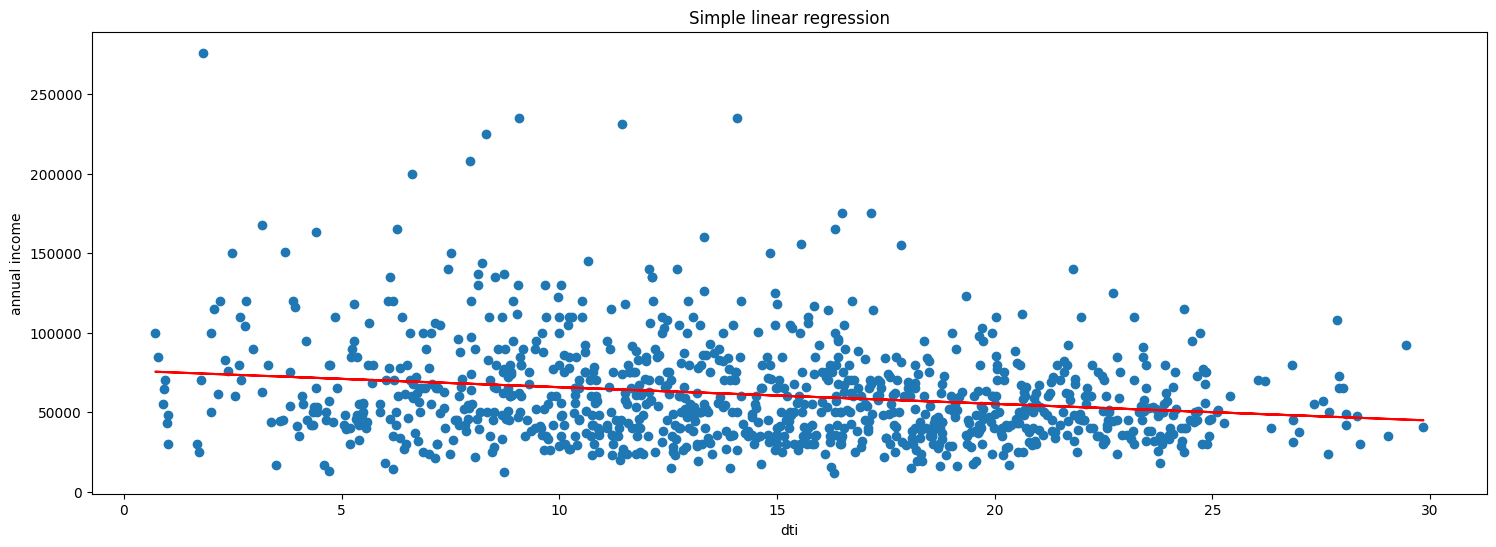

Coefficients:  [-1047.41828397]
Intercept:  76233.58802054495
Score:  0.04195310420001508
Mean squared error equals: 964746162.8402454


In [21]:
#a)

X = bank_df.dti.values.reshape(-1,1)[:1000]
y = bank_df.annual_inc.values.reshape(-1)[:1000]

# Create linear regression object
model = LinearRegression(n_jobs=1)

# Train the model using the training sets
model.fit(X,y)
y_pred = model.predict(X)

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(6)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.ticklabel_format(style='plain') 
plt.xlabel("dti");
plt.ylabel("annual income");
plt.title("Simple linear regression")
plt.show()

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Score: ", model.score(X,y))
print("Mean squared error equals:", mean_squared_error(y, y_pred))

In [45]:
#b) Let's propose model, which uses annual_inc, loan_amnt, total_pymnt, installment and all of their interactions up to third degree
import math
X = bank_df[['annual_inc', 'loan_amnt', 'total_pymnt', 'int_rate']].values.reshape(-1,4)
y = bank_df.dti.values.reshape(-1)

for i in range (len(X)):
    for j in range(4):
        if(math.isnan(X[i][j])):
#             print(X[i])
#             print(i)
            X[i] = [0,0,0,0] # There is some data missing and that is why I change it to zeros

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 54.783872118656696


In [46]:
#  Method that I propose for my data is to use trained data for the predictions and for calculation of MSE 

X = bank_df[['annual_inc', 'loan_amnt', 'total_pymnt', 'int_rate']].values.reshape(-1,4)
y = bank_df.dti.values.reshape(-1)

for i in range (len(X)):
    for j in range(4):
        if(math.isnan(X[i][j])):
#             print(X[i])
#             print(i)
            X[i] = [0,0,0,0] # There is some data missing and that is why I change it to zeros

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_train) 
print("Mean squared error equals: {0}".format(mean_squared_error(y_train, y_pred)))

Mean squared error equals: 50.85584832760982


# Assignment 3 with my dataset

## 1. Linear Regression. A bit of formalism
Let's have a data consisting of $n$ samples. These samples are $(m+1)$ - dimensional vectors, where first $m$ dimensions are called features (explanatory variables) and will be used to predict the last dimension which is called regressand (dependent variable). 

We will have therefore a $n \times m$ matrix **$X$** (called feature matrix) and vector **$y$** of lenght $n$. 

In our simple example, age is a feature, products number is regressand and the data consists of $100$ samples. It forms $100 \times 1$ feature matrix **$X$** and vector **$y$** of length $100$.

In [50]:
X = bank_df.annual_inc.values.reshape(-1,1)[:100]
y = bank_df.dti.values.reshape(-1)[:100]
print(np.shape(X))
print(np.shape(y))

(100, 1)
(100,)


# Exercise 1
a) Create functions predict(b, X) and cost(y_pred, y_true). All inputs should be numpy arrays (take care of dimension scalability!) \
b) For our data X,y, plot cost as the function of b (which is one dimensional vector). Plot the line with best slope among evaluated with cost function.

In [51]:
#a)
def predict(b, X):
    # return matrix multiplication
    return np.matmul(X,b)

def cost(y_pred, y_true):
    # mean squared error without sklearn using only numpy
    subY = y_pred - y_true
    absY = abs(subY)
    powY = pow(absY,2)
    return powY.mean()



#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(predict(test_b, test_X))
print(cost(predict(test_b, test_X),test_y))

[[ 6]
 [11]
 [12]
 [16]]
82.75


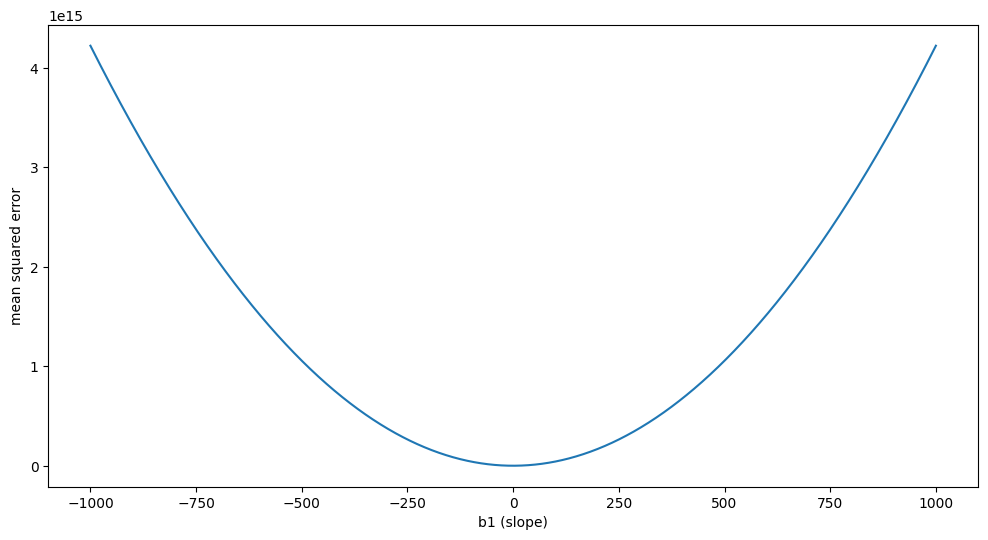

In [52]:
#b)
b1 = list(range(-1000, 1001))
b1_re = np.array(b1).reshape(-1,1)
mse = []*2001

for i in range (2001):
    mse.append(cost(predict(b1_re[i],X),y))
    
# print(mse)
# print("\n")
# print(b1)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.xlabel("b1 (slope)");
plt.ylabel("mean squared error");
plt.plot(b1,mse)

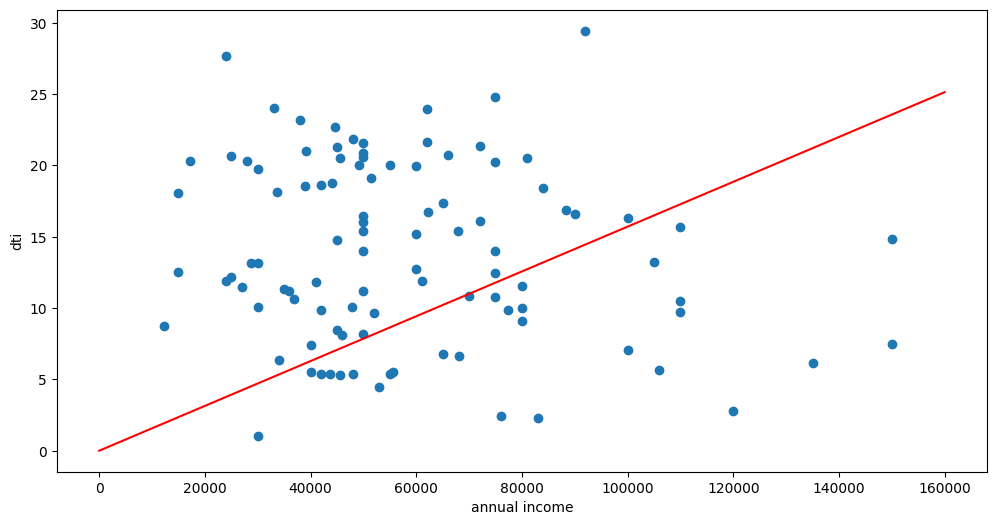

In [57]:
import math
min_er = cost(predict([[0]], X),y)
dokladnosc = 10000
min_b = 0

for i in range (dokladnosc):
    b = math.tan((math.pi*i) / (2*dokladnosc))
    if cost(predict([[b]], X),y)<min_er:
        min_er = cost(predict([[b]], X),y)
        min_b = b
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.xlabel("annual income");
plt.ylabel("dti");
plt.scatter(X, y)
plt.plot([0,160000], [0,160000*min_b],color="red")

## Exercise 2
a) Add bias column to the **$X$** matrix.  
b) Make the code below compatible with functions that you've created so far.

In [81]:
#a) 
X = bank_df.annual_inc.values.reshape(-1,1)[:100]
y = bank_df.dti.values.reshape(-1)[:100]
X = np.c_[X,np.ones((100,1))]
X_oryginal = bank_df.annual_inc.values.reshape(-1,1)[:100]
# print(X)

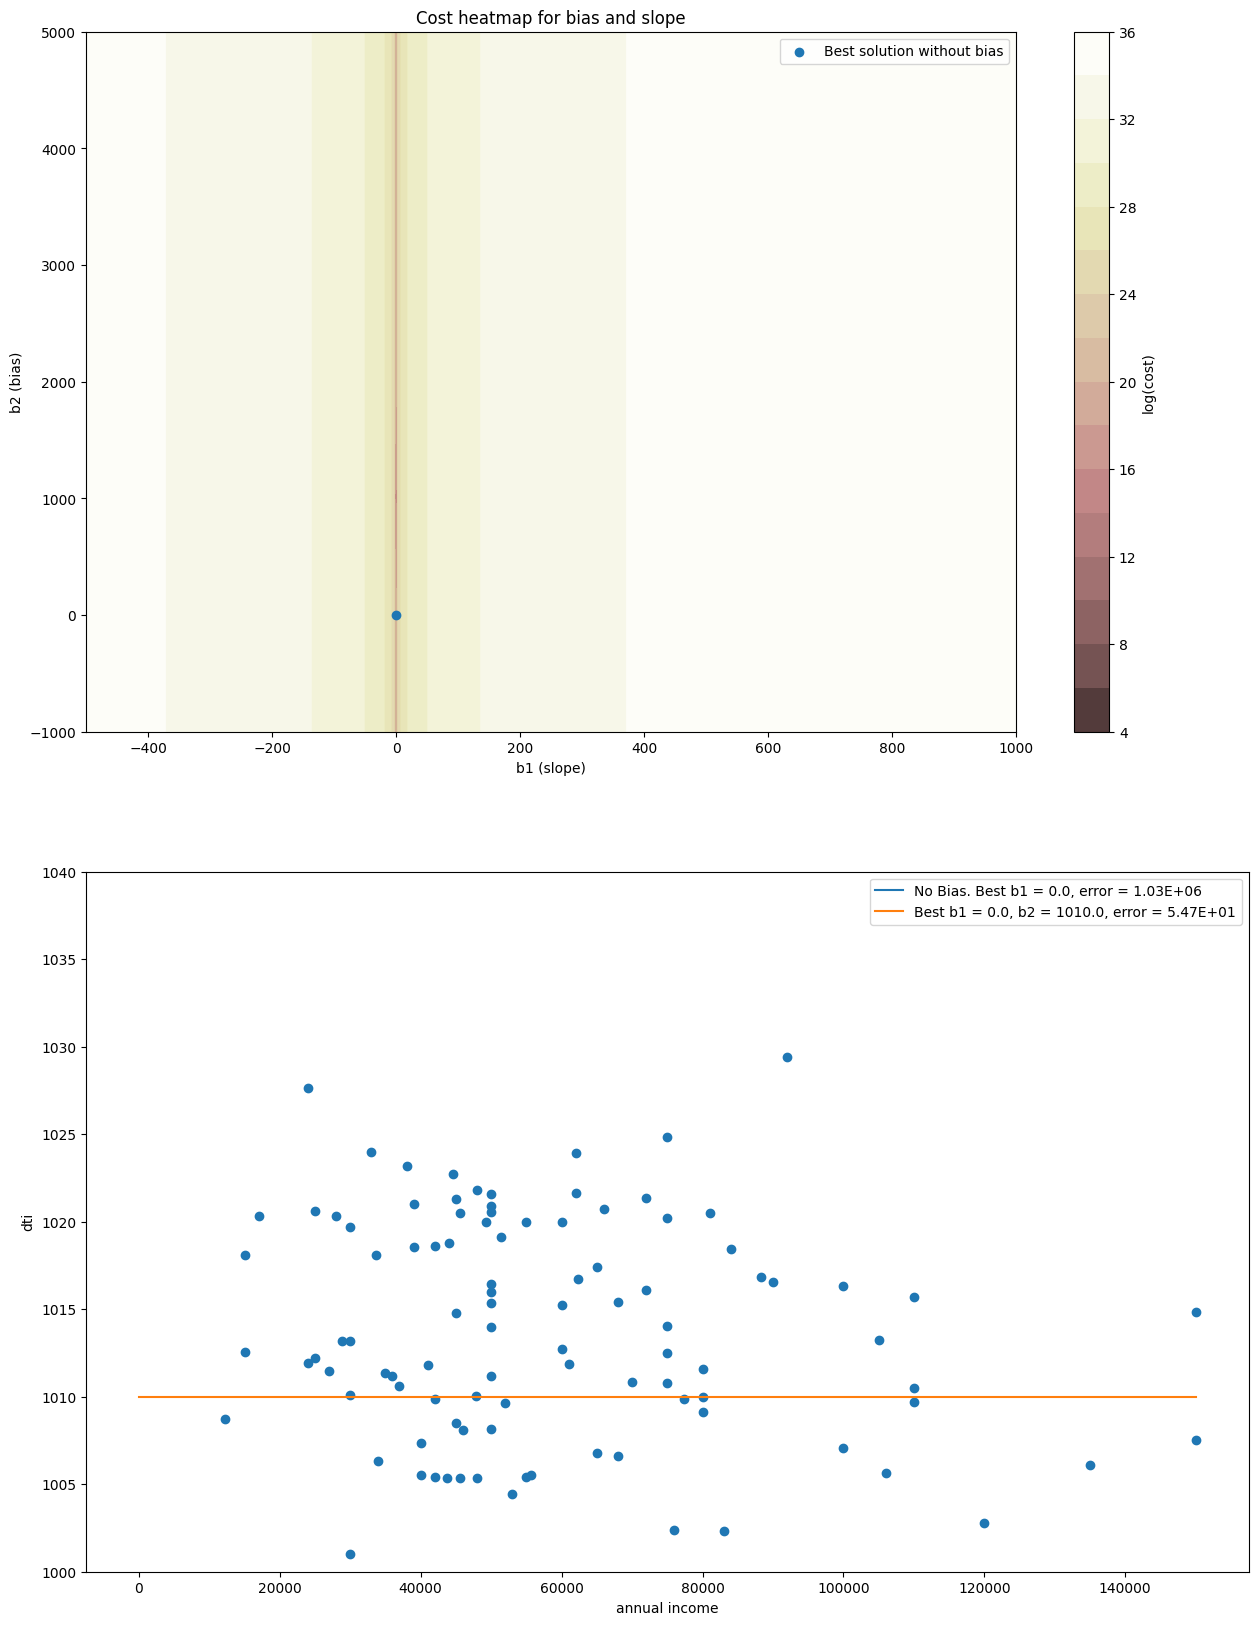

In [101]:
y_shifted = y+1e3

# #No Bias Part
# print(X[:,0].reshape(-1,1))
b_arr = [b1 for b1 in np.linspace(-500, 500, num=1001)]
cost_arr = [cost(predict([b], X[:,0].reshape(-1,1)), y_shifted) for b in b_arr]
best_b1 = b_arr[np.argmin(cost_arr)]

#Bias Part
nb_of_bs = 601 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-500, 1000, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-1e3, 5e3, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix
# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y_shifted)
#         print("---", np.array([[b_x[i,j]], [b_y[i,j]]]))
#         print("-----", X)


plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(best_b1, 0, label = "Best solution without bias")
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

plt.subplot(2,1,2)

plt.ylim(1e3, 1e3+40)
plt.scatter(X_oryginal.T[0], y_shifted)
plt.xlabel("annual income")
plt.ylabel("dti")

# print("--", X_oryginal)
# print("---", X_oryginal.T[0])

x_model = np.linspace(np.min(X), np.max(X), 1000)
y_model = best_b1*x_model
plt.plot(x_model, y_model, label='No Bias. Best b1 = {}, error = {:.2E}'.format(best_b1, cost_arr[np.argmin(cost_arr)]))

best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b_x[best_b1_2d_ind,best_b2_2d_ind]
best_b2 = b_y[best_b1_2d_ind,best_b2_2d_ind]

y_model = best_b1*x_model + best_b2
plt.plot(x_model, y_model, label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(best_b1, best_b2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()

plt.show()

# 3. Standardization

In order to improve performance of many machine learning algorithms, the value standardization is applied. It makes the values of each feature in the data have zero-mean and unit-variance. It is achieved by substracting from each value $x$ the overall mean $\bar{x}$, and then dividing it by feature's standard deviation ${\sigma}$:

$$x' = \frac{x - \bar{x}}{\sigma}. $$

It is important to remember, that bias column should not be standardize!

## Exercise 3
a) Implement function standardize(), which standardize the feature matrix and returns it together with two vectors containing original features' means and standard deviations.  
b) Implement function destandardize(), which restores the original data given standardized feature matrix X and vectors containing original features' means and standard deviations.  
c) Plot original $X,y$ data. Then plot it after standardization. Then plot it after destandardisation.

In [94]:
# a)
X = bank_df.age.values.reshape(-1,1)[:1000]
y = bank_df.products_number.values.reshape(-1)[:1000]

def standardize(X):
    return ((X-np.mean(X,axis=0))/np.std(X,axis=0))

def standardize2(X):
    tab = [ ((X-np.mean(X,axis=0))/np.std(X,axis=0))  ,  np.mean(X,axis=0)  , np.std(X,axis=0)]
    return tab

# b)
def destandardize(X, means, sds):
    return (X * sds)+means

#short test:
W = [[1,2,3],[2,5,4],[3,4,5],[4,5,7]]
standardize2(W)


[array([[-1.34164079, -1.63299316, -1.18321596],
        [-0.4472136 ,  0.81649658, -0.50709255],
        [ 0.4472136 ,  0.        ,  0.16903085],
        [ 1.34164079,  0.81649658,  1.52127766]]),
 array([2.5 , 4.  , 4.75]),
 array([1.11803399, 1.22474487, 1.47901995])]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

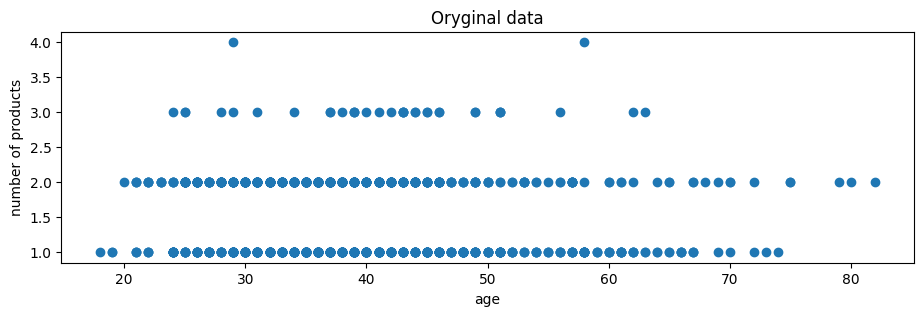

In [96]:
# c) Plot original  𝑋,𝑦  data. Then plot it after standardization. Then plot it after destandardisation.

# oryginal data
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
plt.xlabel("age");
plt.ylabel("number of products");
plt.title("Oryginal data")
plt.scatter(X, y)

# standardized data
X_st = standardize(X[:,0])
y_st = standardize(y[:,0])
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
plt.xlabel("age");
plt.ylabel("number of products");
plt.title("Standardized data")
plt.scatter(X_st, y_st)

# destandardized data
y_mean = np.mean(y, axis=1)
y_sds = np.std(y, axis=1)
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(3)
plt.xlabel("age");
plt.ylabel("number of products");
plt.title("Destandardized data")
plt.scatter(X[:,0], destandardize(y_st,y_mean,y_sds))

## Exercise 4
a) Create functions: *gradient()* which computes gradient for linear regresion and *gradient_descent_step()* which returns new vector **b** being the result of one GDM step.  

b) Take **$X$** consisting of *age* together with bias column. Set **$y$** as price. Standardize both **$X$** (without bias) and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 2 \end{bmatrix}$**. Experiment with other *learning rates*.  

c) Take **$X$** consisting of *age* and *balance*. Set **$y$** as price. Standardize both **$X$** and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 1 \end{bmatrix}$**. Experiment with other *learning rates*.  

d) Try to redo above points without standarization. How can you explain such results?


In [99]:
# a)

def gradient(b, X, y):
    subxb = np.matmul(X,b)
    sub = np.matmul((2*(X.transpose())), (subxb-y))
    return sub / len(y)

def gradient_descent_step(b, X, y, lr):
    return b - gradient(b,X,y)*lr

#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(gradient(test_b, test_X, test_y))
print(gradient_descent_step(test_b, test_X, test_y, 0.1))

[[49. ]
 [75.5]
 [90. ]]
[[-3.9 ]
 [-6.55]
 [-8.  ]]


In [104]:
# b)
X=standardize(X)
y_shifted=standardize(y_shifted)
X_1 = np.c_[X,np.ones((1000,1))]
b = [[3],[2]]
lr = 0.2
arr_b = []

for i in range(10):
    b = gradient_descent_step(b, X_1, y_shifted, lr)
    arr_b.append(b) 
    
#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-5, 5, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-5, 5, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_1) , y_shifted)

plt.figure(figsize=(15,20)) 
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")
print(arr_b[3][0][0])
print(best_b1)
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()

for i in range (10):
    plt.scatter(arr_b[i][0][0], arr_b[i][1][0],color = [[0.09*i,0,0]])
    
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.show()

ValueError: operands could not be broadcast together with shapes (1000,1) (100,1) 